In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys

from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

plt.style.use("~/evanstyle.mplstyle")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors[1] = 'darkgreen'

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [3]:
#toproot = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/"
toproot = "../../data/"
topdirs = {5:toproot+"Run5/", 6:toproot+"Run6/", 7:toproot+"Run7/", 8:toproot+"Run8/", 9:toproot+"Run9/", 10:toproot+"Run10/"}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml", 8:"../configs/run8_config.yaml", 9:"../configs/run9_config.yaml", 10:"../configs/run10_config.yaml"}
titles = {5:"SS uncoated", 6:"Refill of SS uncoated", 7:"MgF2 (50nm)", 8:"Pt (50nm)", 9:"MgF2 (20nm)", 10:"SS304"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    if(n == 6 or n == 5):continue
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n], title=titles[n], ramp_topdir=topdirs[n])


/Users/linsi/Documents/stanford/HV/analysis/ad2-data-processing/notebooks/../AnalysisTools/AnalysisTools.py:137: UserWarning: genfromtxt: Empty input file: "../../data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


In [4]:
#load data into mem if you want
for n, ana in anas.items():
    if(n == 6 or n ==5): continue
    ana.load_dataframe()

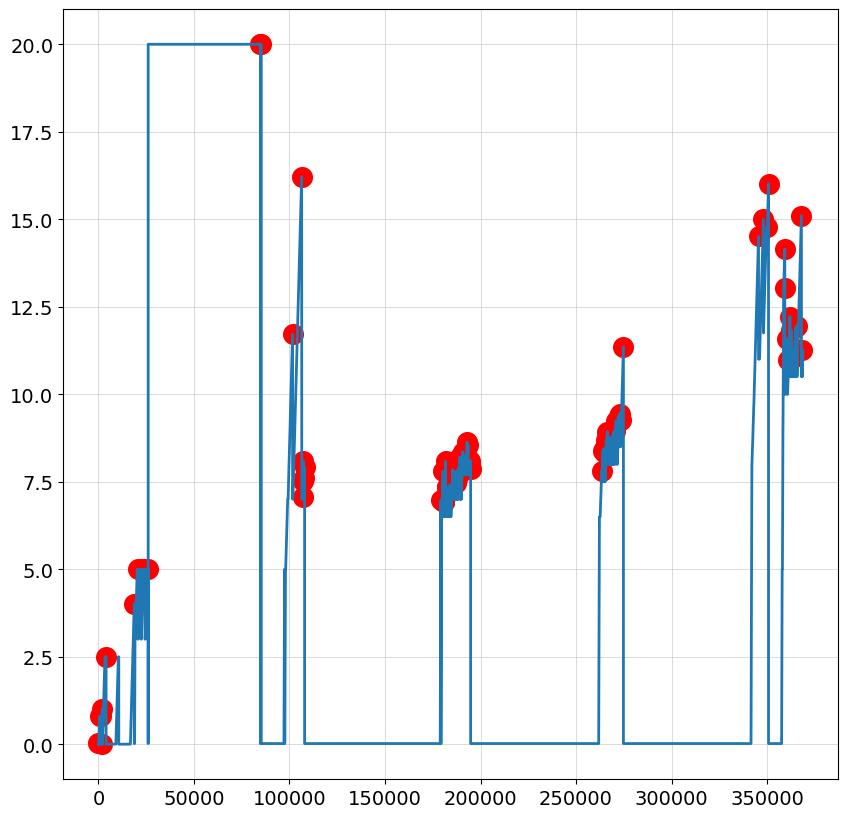

In [5]:
ana = anas[7]

fig, ax = plt.subplots()
t0 = np.min(ana.ramp_data["t"])
tg = ana.g_event_data["t"]-t0
v = ana.ramp_data["v_app"]
ts = np.array(ana.ramp_data["t"]) - t0
ax.plot(ts, v)
ax.scatter(tg, ana.g_event_data["v_app"], color = 'red', s=200)

    
#ax.set_xlim([250000, 280000])
plt.show()
    

In [6]:
ana.create_time_duration_map()


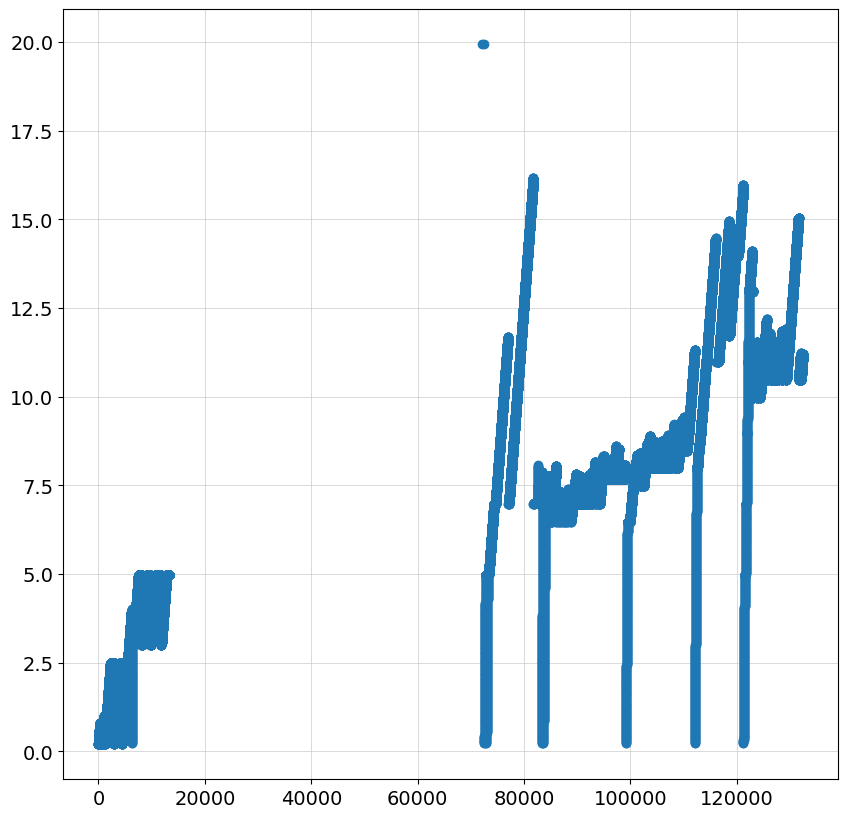

In [7]:
ts = ana.time_duration_map["t"]
durs = ana.time_duration_map["dur"]
vs = ana.time_duration_map["v"]
fig, ax = plt.subplots()
ax.plot(durs, vs, 'o')
#ax.set_xlim([260000, 270000])
plt.show()

In [8]:
print (ana.df["ch3 hv"])

0         0.033134
1         0.033313
2         0.033473
3         0.033562
4          0.03369
           ...    
74448    11.202082
74449    11.204692
74450         None
74451         None
74452         None
Name: ch3 hv, Length: 74453, dtype: object


In [9]:
#choose which run to use
ana = anas[9]
cosmic_file = "../../data/Run9/cosmic_pmt_properties.p"

d = ana.df
d = d[~d["ch3 charge"].isna()]
#select charge event mask for which to qualify coincidences with
mask = (d["ch3 n negpeaks"] > 0) & (d["ch3 n pospeaks"] == 0) & (np.abs(d["ch3 charge"]) > 1)
#mask = (d["ch3 n pospeaks"] > 0) & (np.abs(d["ch3 charge"]) > 1) #looking at positive polar events

d = d[mask]

#coincidence info
time_ref_ch = 3 #software channel for which to look for coincidences of
coinc = 10 #long coincidence window in seconds, sets the length of a movie observing these events. 

coinc_ns = 0
event_dfs = ana.get_coincidence(d, time_ref_ch, coinc, coinc_ns)

In [10]:
print (ana.df["ch3 hv"])

0         None
1         None
2         None
3         None
4         None
          ... 
205781    None
205782    None
205783    None
205784    None
205785    None
Name: ch3 hv, Length: 205786, dtype: object


[4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 4.9835, 3.8809350886767855, 0.5269899931887454, 0.0730820179708931, 0.011652136413338841, 0.003338490136548924, 0.0022133583169339586, 0.0020610879930155254, 0.0020404804062936787, 0.002037691467388381, 0.0020373140248317887, 0.00203725494

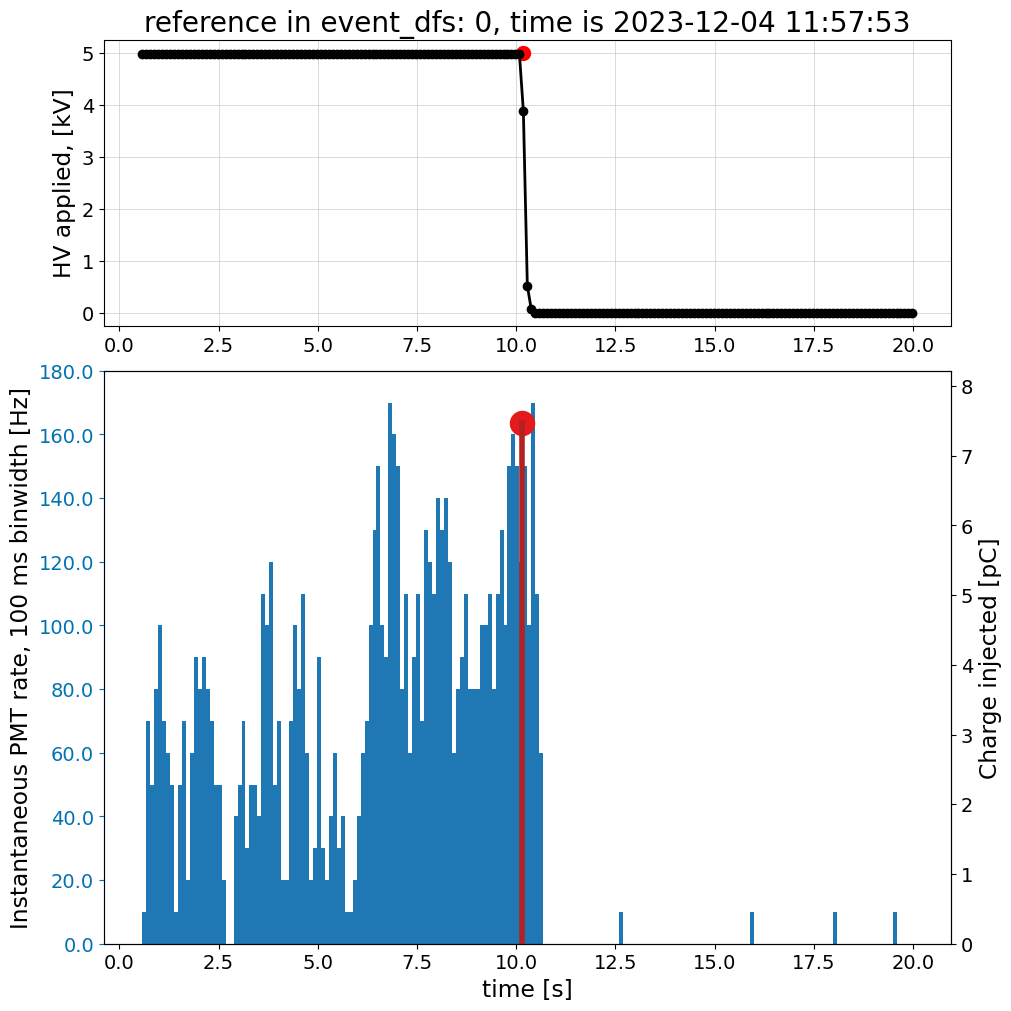

[6.692502502548505, 6.692702034543169, 6.6929015665626155, 6.693101098585415, 6.693300630608669, 6.693500162631985, 6.693699694655145, 6.693898818079902, 6.694097632833607, 6.6942964058131444, 6.694495173139155, 6.694693939700039, 6.694892706157377, 6.695091472600701, 6.695290239042128, 6.6954890054832985, 6.695687771924432, 6.695886693827504, 6.6960861106272676, 6.696285626100694, 6.6964851549281725, 6.696684685562927, 6.696884216442273, 6.697083747354718, 6.697283278271646, 6.69748280918918, 6.697682340106794, 6.6978818654400785, 6.69808101608424, 6.698279986967461, 6.698478933522638, 6.698677876785365, 6.698876819602509, 6.699075762359348, 6.699274705108025, 6.699473647855599, 6.699672590603023, 6.699871532963913, 6.700070369107484, 6.700269148326099, 6.700467919840745, 6.700666690312768, 6.700865460643689, 6.701064230955513, 6.701263001264752, 6.701461771573642, 6.701660541882484, 6.701859312191321, 6.702058423402125, 6.7022585069611695, 6.702458776069938, 6.702659070290178, 6.7028

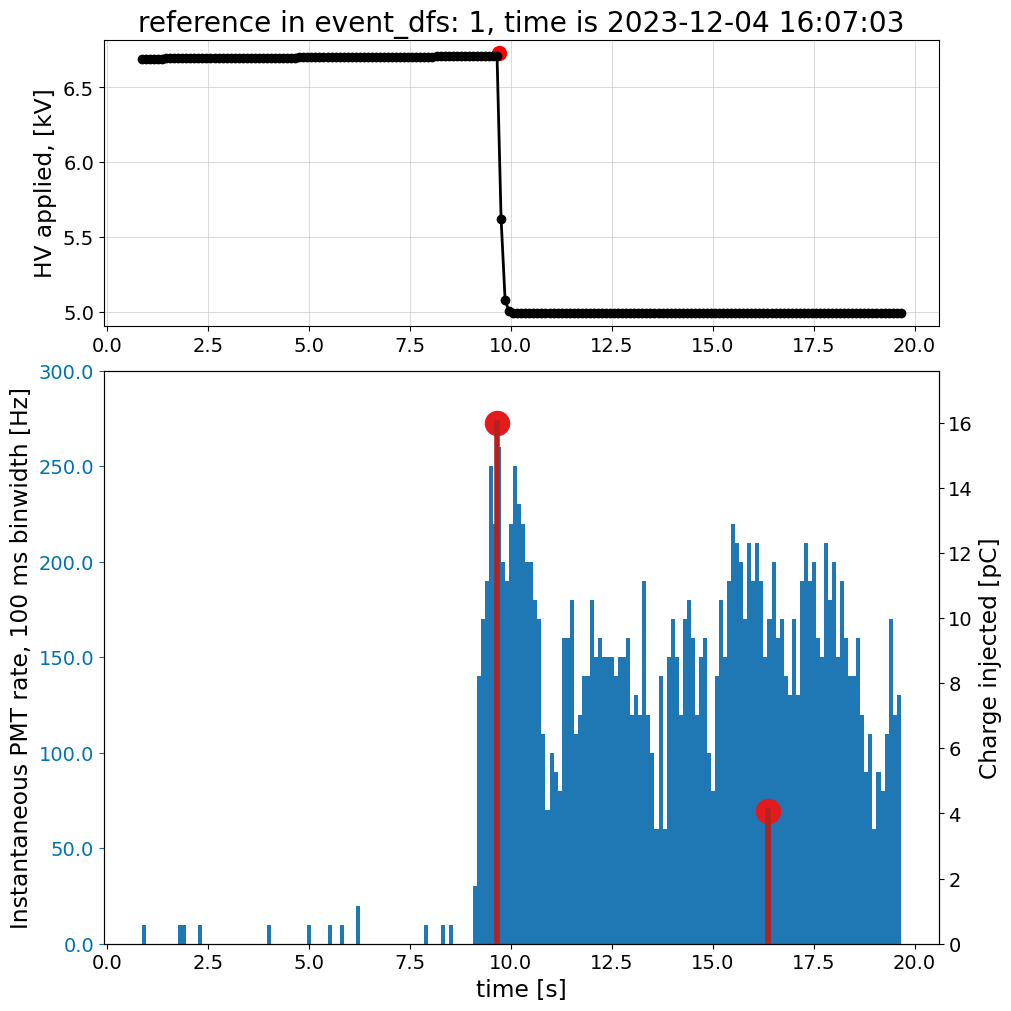

[4.430432900504862, 4.430632049755241, 4.430831199005531, 4.431030348255809, 4.431229437689761, 4.43142841628777, 4.43162737668533, 4.431826334619723, 4.432025292220762, 4.432224249776684, 4.432423207326503, 4.432622164875495, 4.432821122424375, 4.4330200799732395, 4.433218996742992, 4.433417395622893, 4.433615626003715, 4.433813833580621, 4.434012038071348, 4.434210242144406, 4.434408446160936, 4.434606650169818, 4.4348048541776635, 4.43500305818537, 4.435201262193058, 4.43540037945617, 4.435600982304217, 4.435801818892955, 4.436002687115117, 4.436203559618406, 4.436404432701084, 4.436605305862174, 4.4368061790338755, 4.437007052207013, 4.437207925380345, 4.437408667157111, 4.437608352588129, 4.437807739172844, 4.438007085313036, 4.438206425979645, 4.4384057659054825, 4.43860510573107, 4.438804445543088, 4.43900378535327, 4.439203125163204, 4.439402464973103, 4.439601897198484, 4.439801416212179, 4.440000947280089, 4.4402004799793655, 4.440400012899422, 4.440599545849359, 4.4407990788

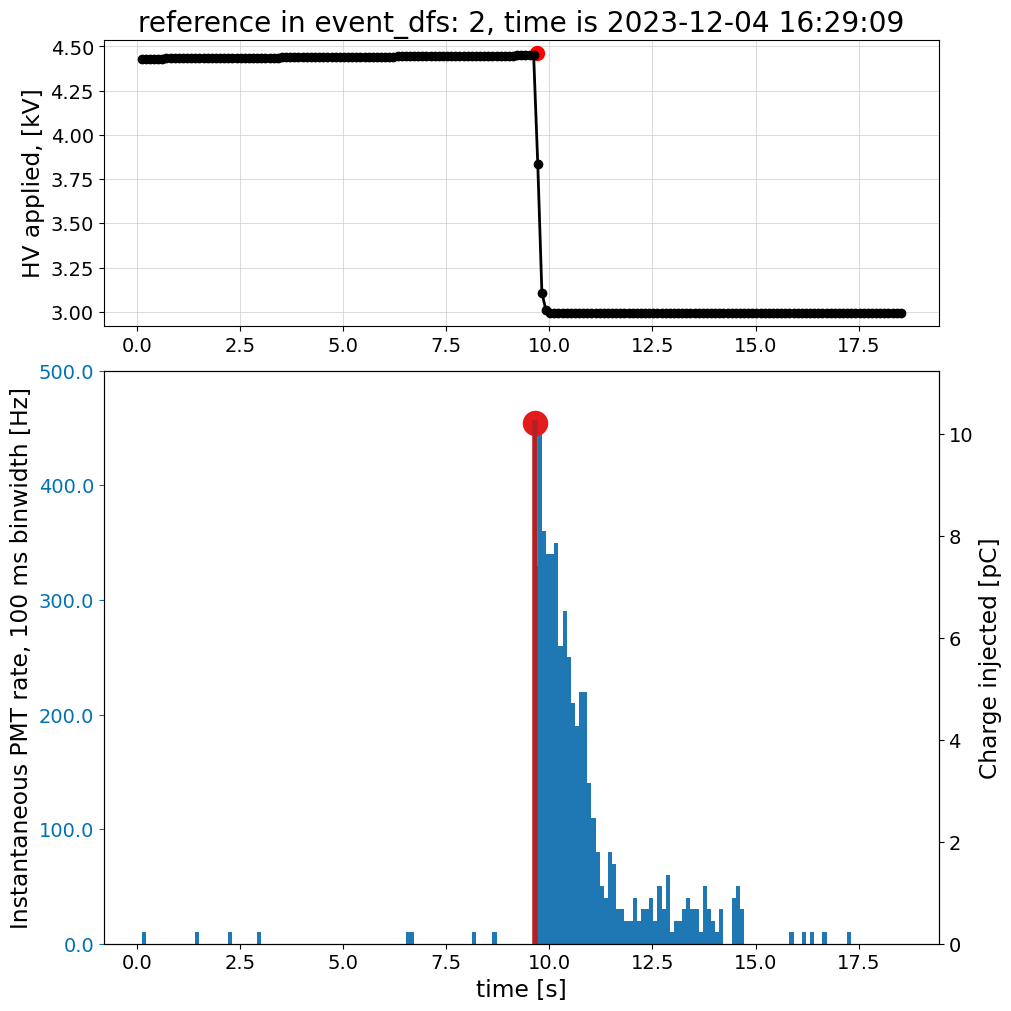

[7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999999999, 7.475249999

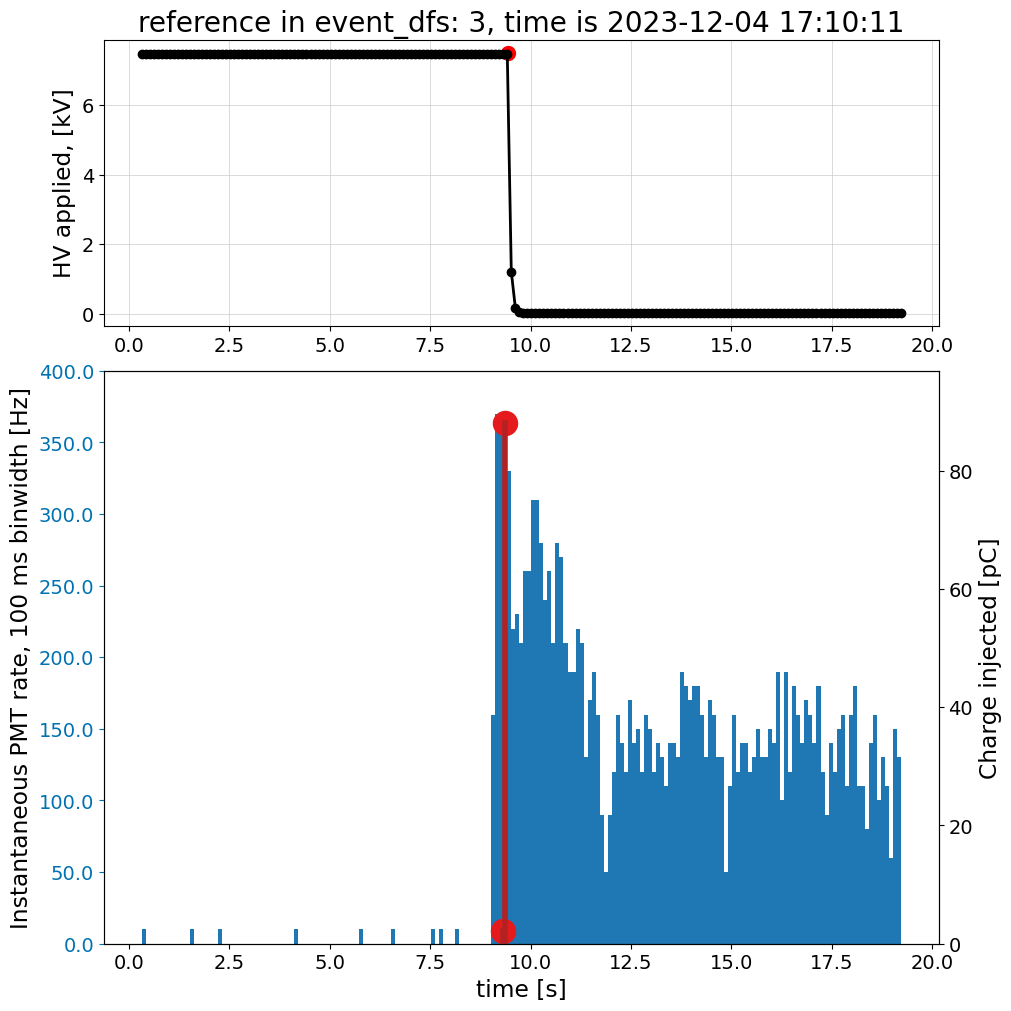

[4.370091582037415, 4.370291345948184, 4.370491240355714, 4.370691152424093, 4.370891066882613, 4.3710909816646035, 4.371290896490372, 4.371490811322064, 4.371690726154557, 4.37189064098716, 4.372090555819778, 4.372290031956491, 4.372488571464098, 4.372686950552241, 4.372885307929931, 4.373083662369422, 4.373282016411272, 4.373480370399307, 4.373678724380057, 4.373877078359823, 4.374075432339456, 4.37427406685152, 4.374473585285814, 4.374673279125523, 4.374872996703822, 4.375072717494794, 4.375272438720553, 4.375472160005157, 4.375671881297723, 4.375871602591368, 4.376071323885158, 4.376271042742135, 4.376470522048715, 4.376669880777211, 4.376869223187208, 4.3770685633887325, 4.377267903291372, 4.3774672431535615, 4.377666583010276, 4.37786592286625, 4.378065262722125, 4.3782646025779846, 4.378463874081607, 4.37866304068202, 4.378862191130743, 4.3790613393935685, 4.379260487360564, 4.379459635287523, 4.379658783209063, 4.37985793112987, 4.3800570790505775, 4.380256226971272, 4.38045541

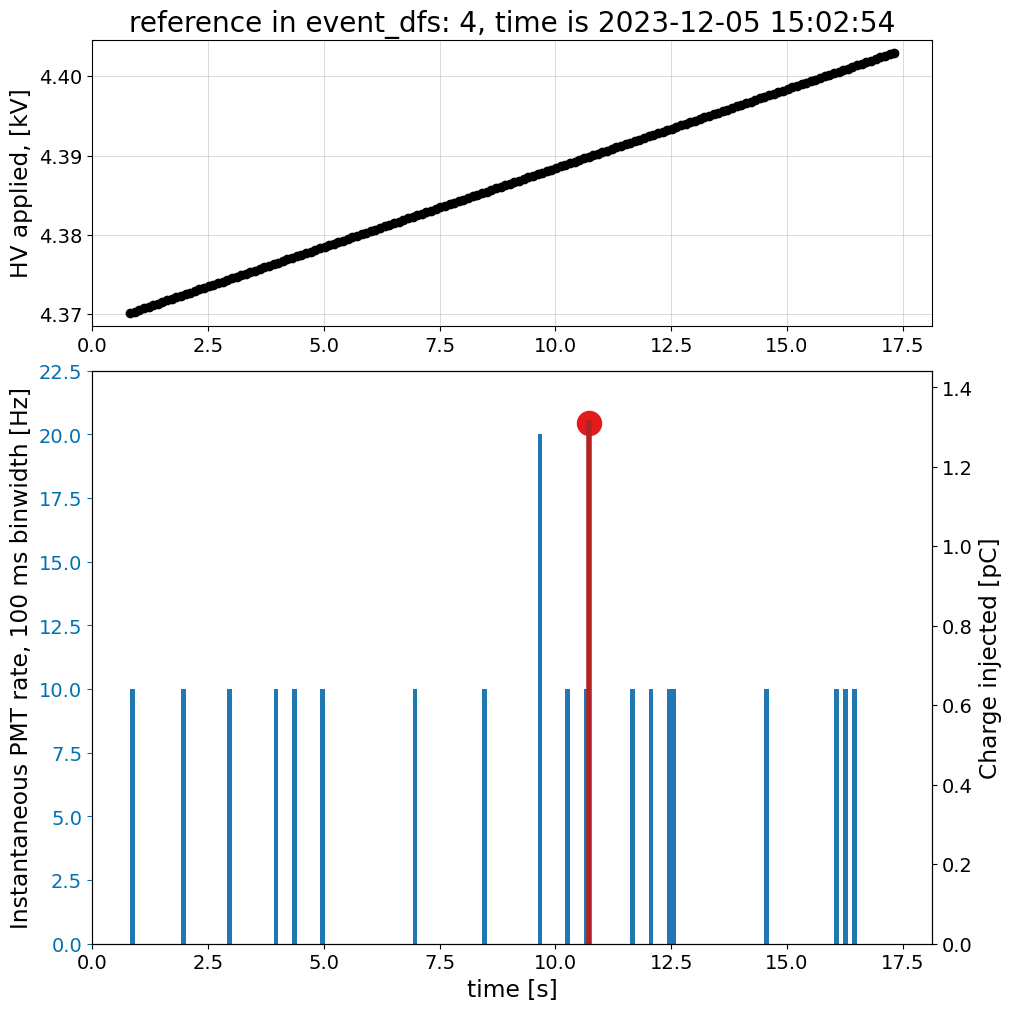

[6.694168083661575, 6.694366823150077, 6.694566052836994, 6.694765377743337, 6.69496471553625, 6.695164055073176, 6.695363394846129, 6.695562734651023, 6.695762074460243, 6.695961414270046, 6.696160754079929, 6.696360093889014, 6.6965594336680105, 6.696758773434359, 6.696958113198998, 6.697157452963406, 6.697356792727784, 6.697556132492155, 6.697755472256526, 6.697954812020898, 6.69815415178527, 6.698353491549641, 6.698552831328945, 6.698752171134046, 6.698951510943292, 6.6991508507530995, 6.699350190562984, 6.6995495303728765, 6.699748870182772, 6.699948209992667, 6.700147549802562, 6.700346889612458, 6.700546108827993, 6.700744412219732, 6.700942462729185, 6.701140479014678, 6.701338490668449, 6.701536501695386, 6.701734512637488, 6.701932523568111, 6.702130534497179, 6.702328545426038, 6.702526556354867, 6.70272571412341, 6.702926177045841, 6.703126826750109, 6.703327501732599, 6.703528180136128, 6.703728859002647, 6.703929537931826, 6.7041302168694825, 6.704330895808287, 6.70453157

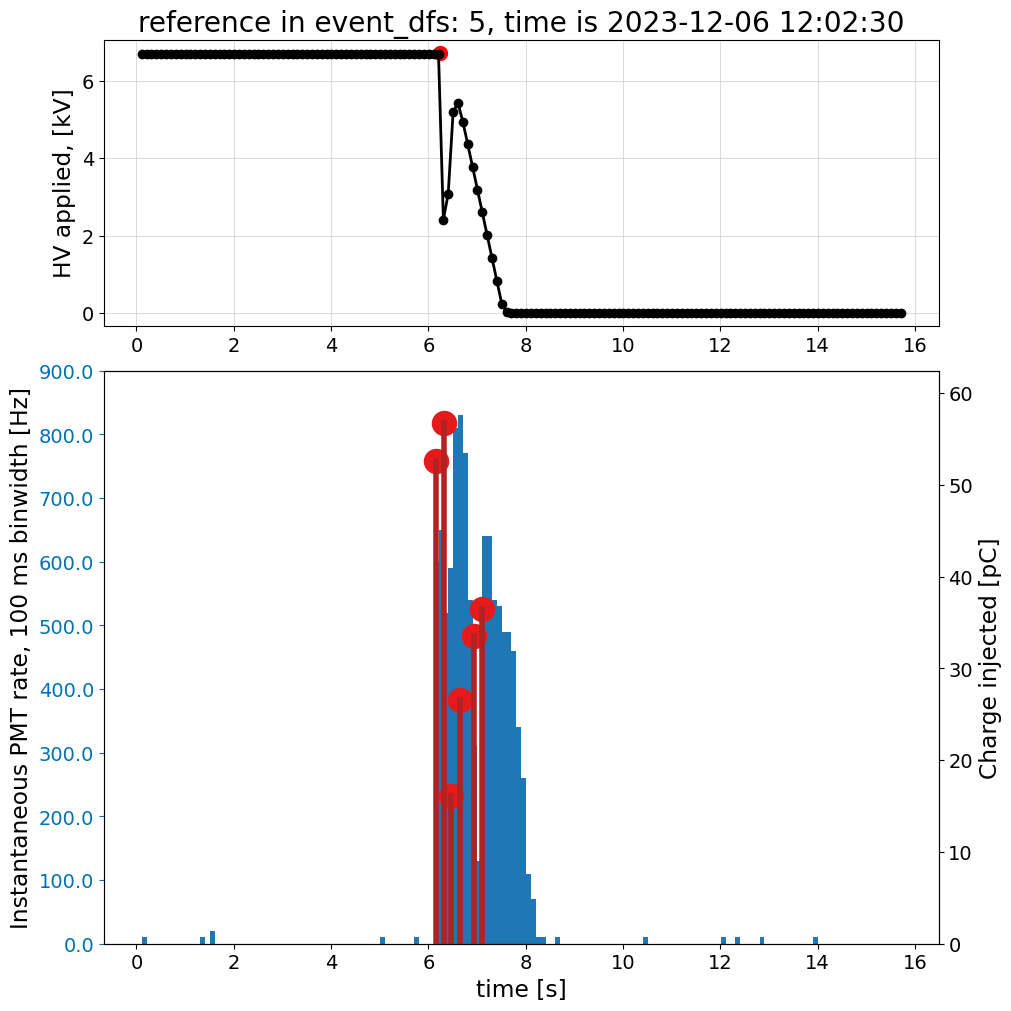

[8.173708956367667, 8.173909065047162, 8.17410917379234, 8.174309282546403, 8.17450939130167, 8.174709500057102, 8.174909608812554, 8.175108935050586, 8.175307612047632, 8.17550620046597, 8.175704776896463, 8.175903351704571, 8.176101926293114, 8.176300500851944, 8.176499075406749, 8.17669764996101, 8.1768962245152, 8.17709494603824, 8.177294167294654, 8.177493491099524, 8.177692828782847, 8.177892168344416, 8.17809150816018, 8.178290848010345, 8.178490187865167, 8.17868952772062, 8.178888867576154, 8.179088201543562, 8.179287154996393, 8.179485926975323, 8.179684674394386, 8.17988341848962, 8.18008216213503, 8.180280905719558, 8.180479649295847, 8.18067839287102, 8.180877136446044, 8.181075882665057, 8.181274999946554, 8.181474309640448, 8.181673645374577, 8.181872984632877, 8.18207232436812, 8.182271664167912, 8.18247100397644, 8.18267034378615, 8.182869683596023, 8.183069023405913, 8.183268309802767, 8.183467481864055, 8.183666634319621, 8.183865784121837, 8.18406493356496, 8.184264

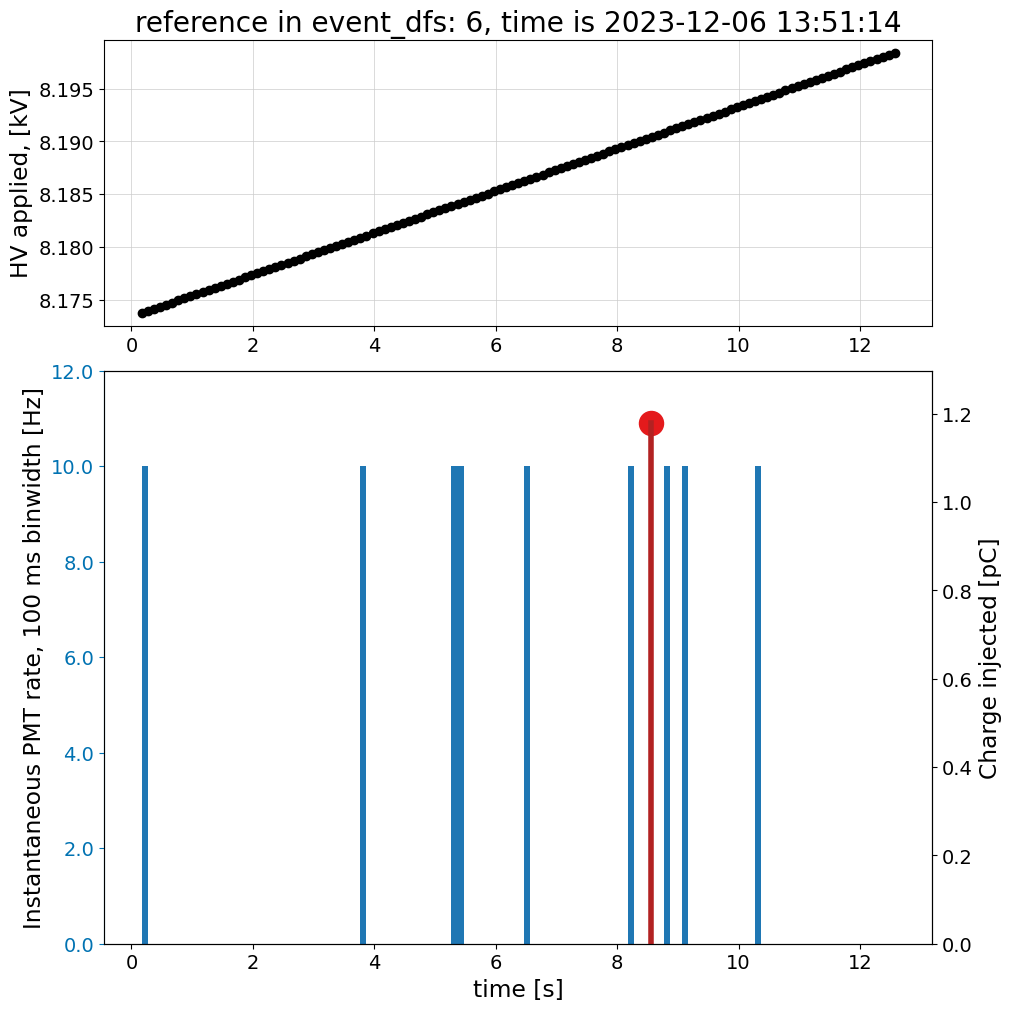

[8.669115448204222, 8.669314214095174, 8.66951297998609, 8.669711896991554, 8.669911594588752, 8.670111480500202, 8.670311391897267, 8.670511306743435, 8.67071122205639, 8.670911137432524, 8.671111052817205, 8.671310968203041, 8.671510883589036, 8.67171079897481, 8.671910605025479, 8.672110344554572, 8.672310075080931, 8.672509804388898, 8.672709533531975, 8.672909262652738, 8.67310899177048, 8.673308720887812, 8.673508450005091, 8.67370817912236, 8.673907609053494, 8.674106634656068, 8.67430559982292, 8.67450455681067, 8.674703512691499, 8.674902468422522, 8.675101424133269, 8.67530037984127, 8.675499335548905, 8.675698291256486, 8.675896369830756, 8.676089707471116, 8.676281880647593, 8.676473896230716, 8.676665890485857, 8.67685788185457, 8.67704987283264, 8.677241863757844, 8.677433854675895, 7.421950211230814, 7.038906442019692, 6.987067006145699, 6.9800512880274574, 6.979101812017837, 6.978973314168059, 6.978955923841995, 6.978953570312803, 6.978953251796655, 6.9789532086901005, 

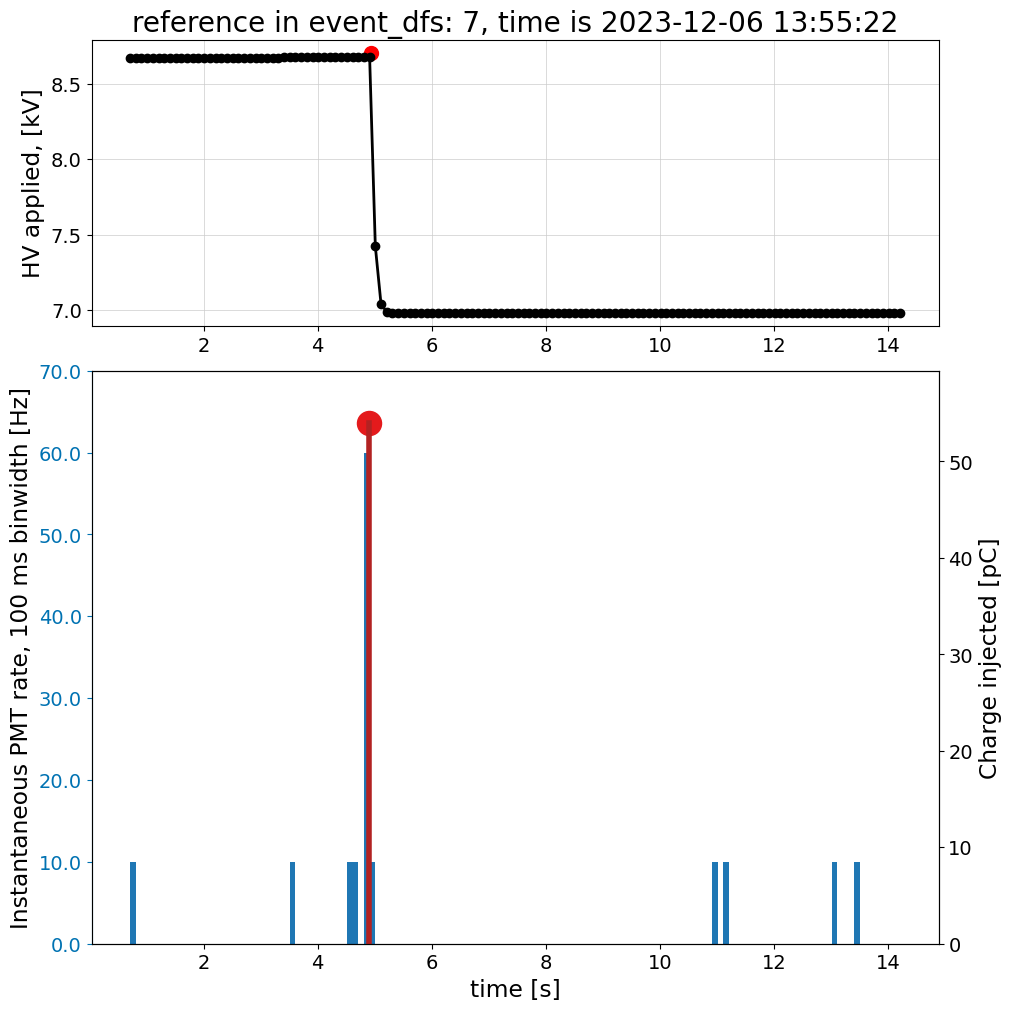

[7.343835109248127, 7.344034066493249, 7.344233023723186, 7.344431980951066, 7.344630938178669, 7.344829895406234, 7.34502895136703, 7.345228675358683, 7.345428576108624, 7.345628500780245, 7.34582842868932, 7.346028357036535, 7.346228285443049, 7.3464282138575845, 7.346628142273209, 7.3468280706889795, 7.347027952523803, 7.347226925474537, 7.347425559612194, 7.3476241478964015, 7.347822729975004, 7.3480213112137704, 7.348219892338876, 7.348418473448601, 7.348617054556242, 7.348815635663601, 7.3490142167709225, 7.34921303643932, 7.3494122934951935, 7.349611622144968, 7.34981096048394, 7.350010300134205, 7.350209639961933, 7.350408979813679, 7.350608319668676, 7.350807659524112, 7.351006999379609, 7.351206350790218, 7.351405834491098, 7.351605360174798, 7.351804891540266, 7.352004423674677, 7.352203955913153, 7.352403488165714, 7.352603020420181, 7.3528025526749055, 7.353002084929666, 7.35320161718443, 7.353400775389754, 7.35359959719176, 7.353798372547102, 7.353997141616559, 7.35419590

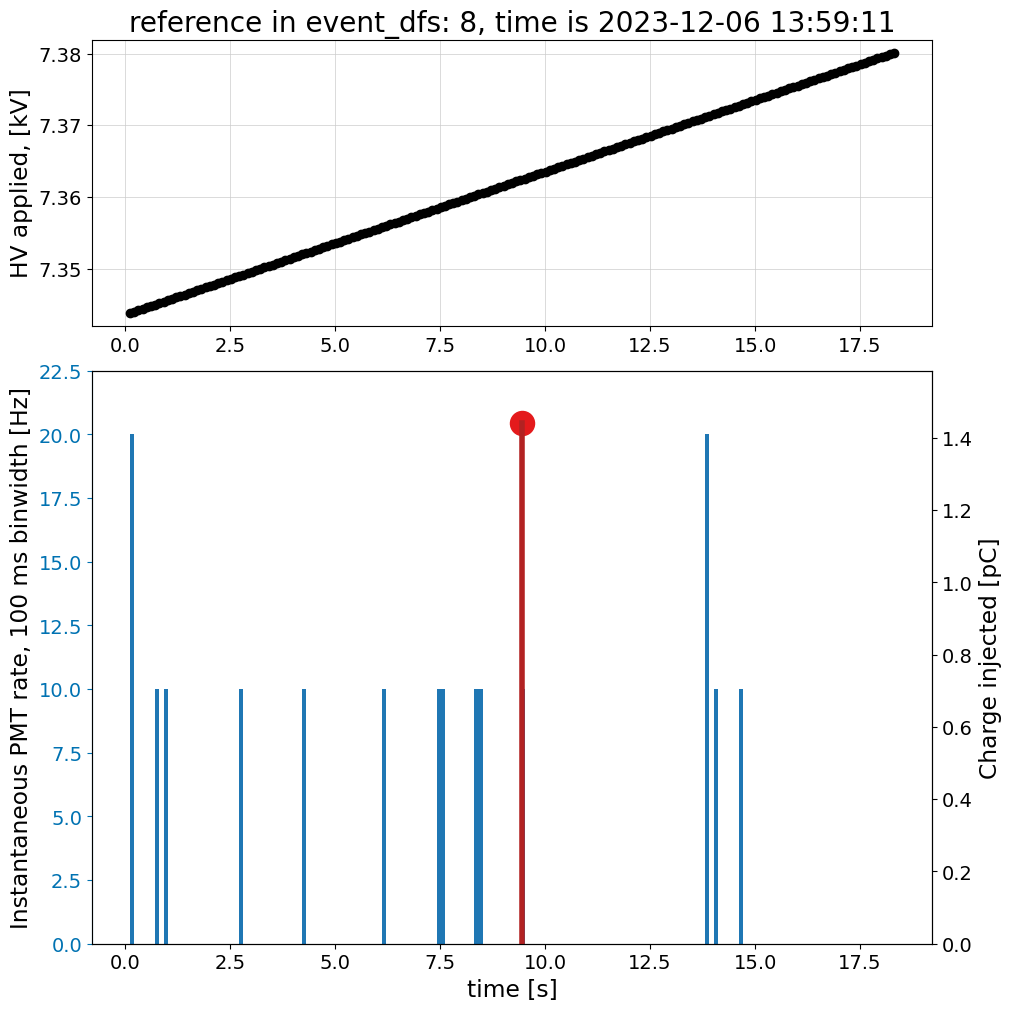

[7.5653802089055935, 7.565578979757785, 7.565777750569555, 7.5659765213758545, 7.566175292181411, 7.566374062986868, 7.566572833792312, 7.566772038221968, 7.56697184499105, 7.567171742346795, 7.567371651962135, 7.567571563236635, 7.567771474735677, 7.567971386265109, 7.568171297798651, 7.568371209332753, 7.5685711208669275, 7.568771017056215, 7.568970782268086, 7.569170509544899, 7.569370231687749, 7.569569953135793, 7.569769674489805, 7.56996939583109, 7.5701691171706535, 7.570368838509982, 7.57056855984928, 7.570768281188574, 7.570967742055851, 7.571166931887064, 7.571366083581046, 7.571565230113706, 7.571764375947857, 7.571963521687475, 7.572162667414297, 7.572361813139387, 7.572560958864244, 7.572760104589071, 7.572959109801834, 7.573157760278481, 7.573356345742031, 7.573554922406998, 7.573753497881204, 7.573952073194258, 7.574150648485501, 7.574349223773795, 7.574547799061689, 7.574746374349527, 7.574944971831729, 7.57514420507488, 7.575343694800587, 7.5755432192375, 7.57574274837

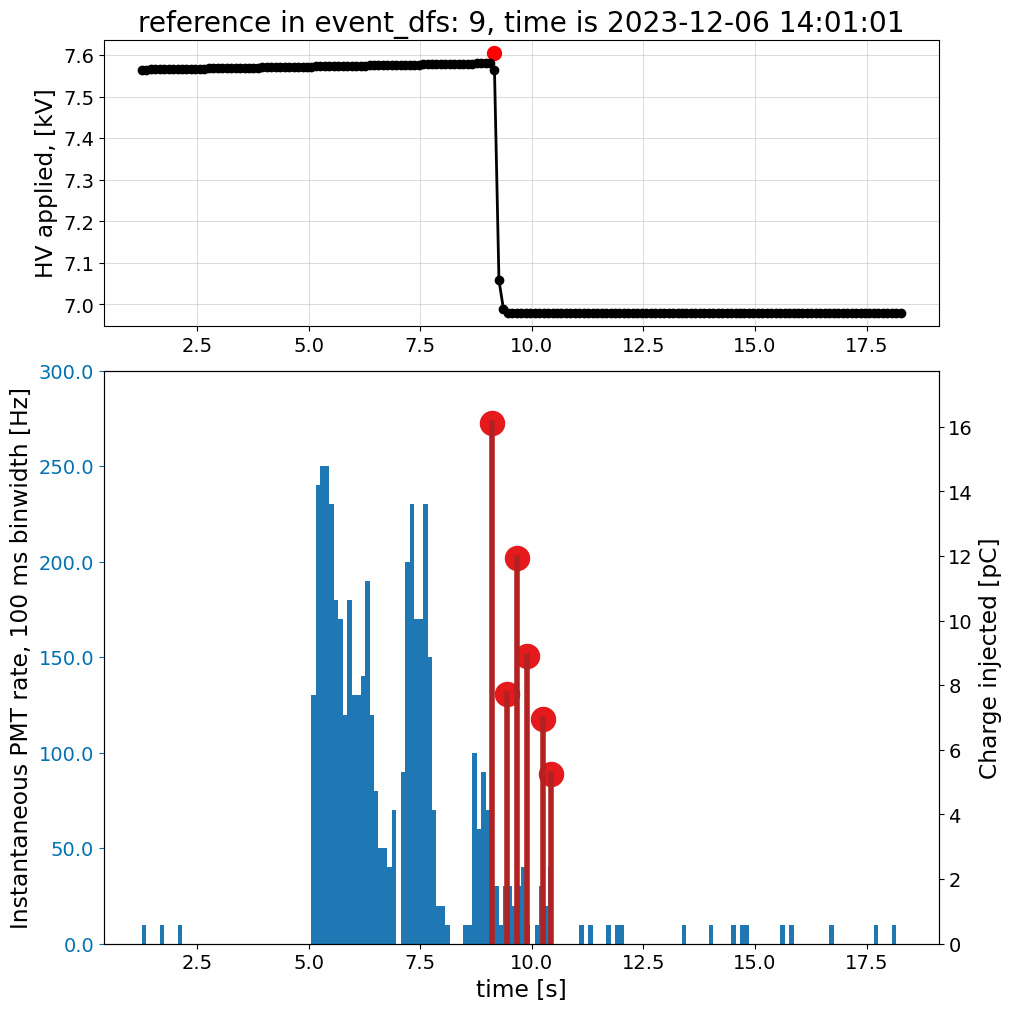

[8.64554132773144, 8.645740667495504, 8.645940007259568, 8.646139347023633, 8.646338686788004, 8.646538141654865, 8.646737662161215, 8.64693719155092, 8.647136722142859, 8.647336252897503, 8.647535783674169, 8.647735314453811, 8.64793484523386, 8.648134376013962, 8.648333906794072, 8.648533438545936, 8.648732972695733, 8.648932507281362, 8.649132041925979, 8.649331576578573, 8.64953111123225, 8.649730645886073, 8.649930180539917, 8.650129715193762, 8.650329249847607, 8.650528742661185, 8.650727970600604, 8.650927129828377, 8.651126279757014, 8.651325428427153, 8.651524576926972, 8.651723725403741, 8.651922873877389, 8.652122022350616, 8.652321170823786, 8.65252031929694, 8.65271936722343, 8.652918336408023, 8.653117294936042, 8.653316252021845, 8.65351520891247, 8.653714165776675, 8.653913122637306, 8.654112079497454, 8.654311036357537, 8.654509993217609, 8.654709150601256, 8.654908924892945, 8.655108820227687, 8.655308731943851, 8.655508645877006, 8.655708560110199, 8.655908474383995,

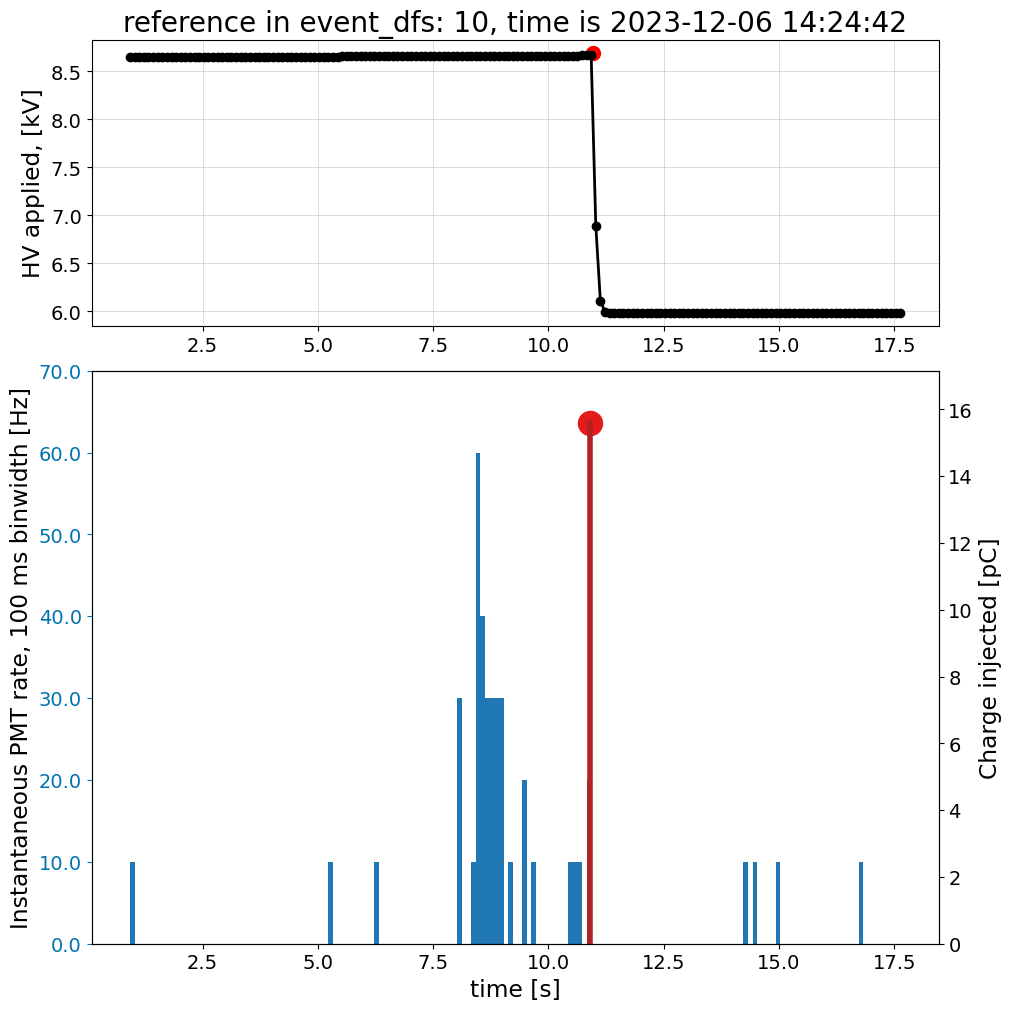

[8.522454156984569, 8.522652925080672, 8.522851693167697, 8.523050461253492, 8.52324922933912, 8.523447997424725, 8.5236469560892, 8.523846079193182, 8.524045224865649, 8.524244373592431, 8.524443522732575, 8.52464267192866, 8.524841821132314, 8.525040970336992, 8.525240119541811, 8.525439268746648, 8.525638478684924, 8.525837943985628, 8.526037465864645, 8.526236995400723, 8.52643652597307, 8.526636056685664, 8.526835587417239, 8.52703511815138, 8.52723464888587, 8.527434179620407, 8.527633710354472, 8.52783301766379, 8.528032188305069, 8.528231340450311, 8.52843049009238, 8.528629639395676, 8.528828788653131, 8.52902793790438, 8.529227087154785, 8.52942623640508, 8.529625385655358, 8.529824620387663, 8.530024098821059, 8.530223623752216, 8.53042315497617, 8.530622687051762, 8.530822219242614, 8.531021751449062, 8.531221283657622, 8.531420815866468, 8.531620348075352, 8.531819873468276, 8.532019268945916, 8.532218616289637, 8.532417957119126, 8.53261729706701, 8.532816636895578, 8.533

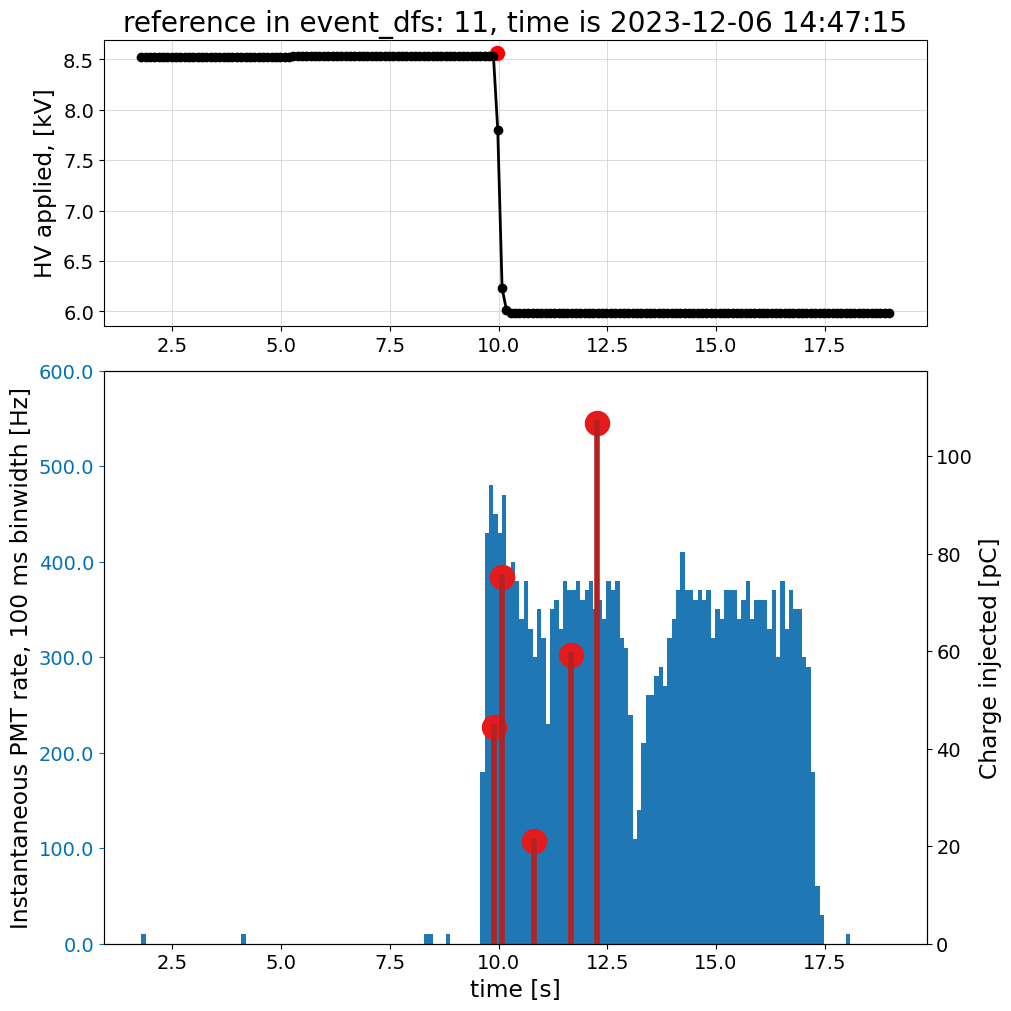

[9.294858095879588, 9.295057429841123, 9.295256768859526, 9.295456108562304, 9.295655448357701, 9.295854788165634, 9.296054127975264, 9.296253467785125, 9.296452807595013, 9.29665212339772, 9.296851174573858, 9.2970501426002, 9.297249099373419, 9.297448054623693, 9.297647009667857, 9.297845964684127, 9.298044919696622, 9.298243874708605, 9.298442829720523, 9.298641784732427, 9.29884121370155, 9.299041061773423, 9.299240967570942, 9.299440881180791, 9.299640795847926, 9.29984071065815, 9.300040625487739, 9.30024054031995, 9.300440455152513, 9.300640369985128, 9.300840211245657, 9.301039802842334, 9.301239343249225, 9.30143887672832, 9.301638409269836, 9.301837941684465, 9.302037474081922, 9.302237006477057, 9.302436538871875, 9.302636071266653, 9.302835603665722, 9.303035136188829, 9.303234668762041, 9.30343420134203, 9.303633733922942, 9.303833266503974, 9.304032799085025, 9.304232331666078, 9.304431864247132, 9.304631396828183, 9.304830929409237, 9.305030137980333, 9.305228962572611, 

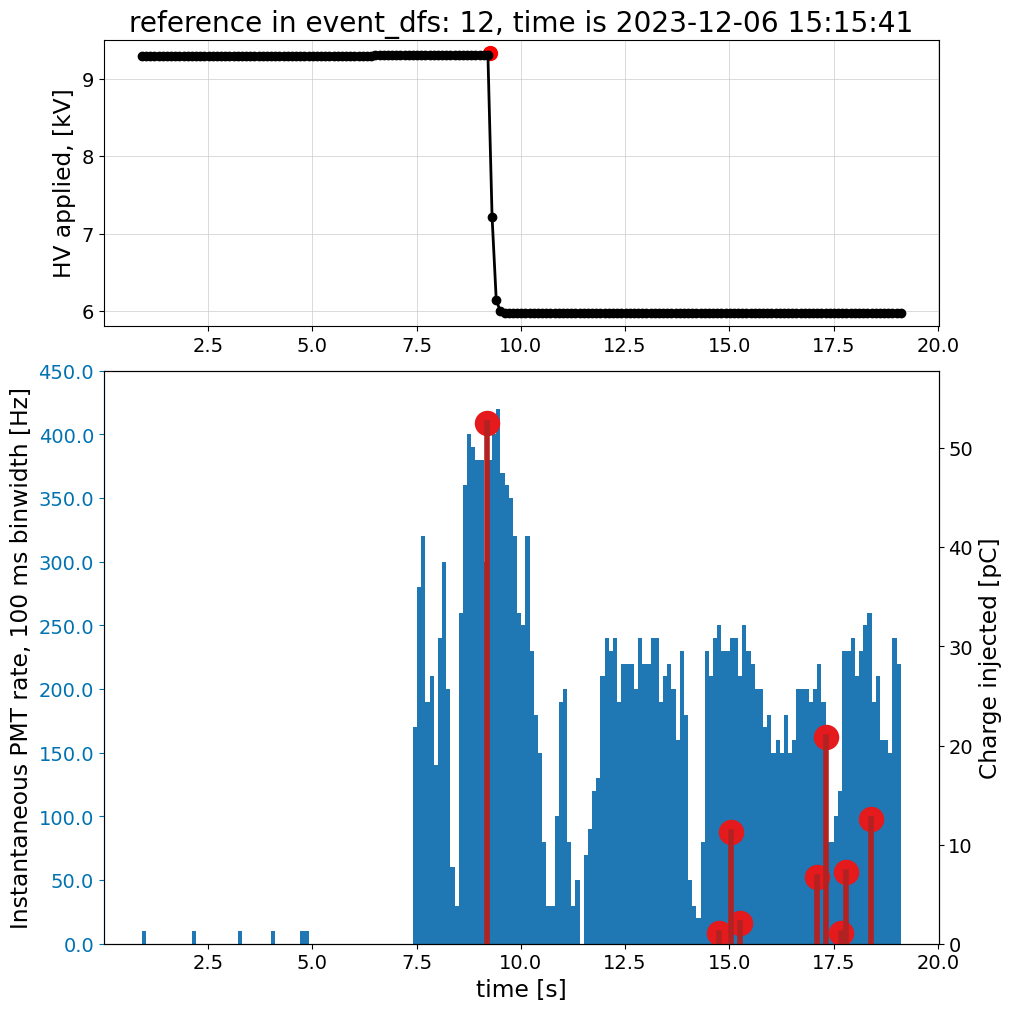

[11.002473246695422, 11.002672586551375, 11.002871926407321, 11.003071074503092, 11.003270055634294, 11.003469013819915, 11.003667968900185, 11.00386692356019, 11.004065878163319, 11.00426483275875, 11.004463787353139, 11.004662741947387, 11.004861696541617, 11.005060739074054, 11.005260025519114, 11.005459358106851, 11.005658696939328, 11.005858036616948, 11.006057376408938, 11.006256716216411, 11.006456056025979, 11.006655395835827, 11.00685473564572, 11.007054075453857, 11.007253415230608, 11.007452754995922, 11.007652094759694, 11.007851434523253, 11.008050774286787, 11.008250114050316, 11.008449453813842, 11.00864879357737, 11.008848133340896, 11.009047473104394, 11.009246711557862, 11.009445872762125, 11.009645023511823, 11.00984417284665, 11.010043321989992, 11.01024247110742, 11.010441620221343, 11.010640769334787, 11.01083991844817, 11.011039067561542, 11.011238180326243, 11.01143716723351, 11.011636128120635, 11.011835085486307, 11.012034042375406, 11.012232999200007, 11.0124

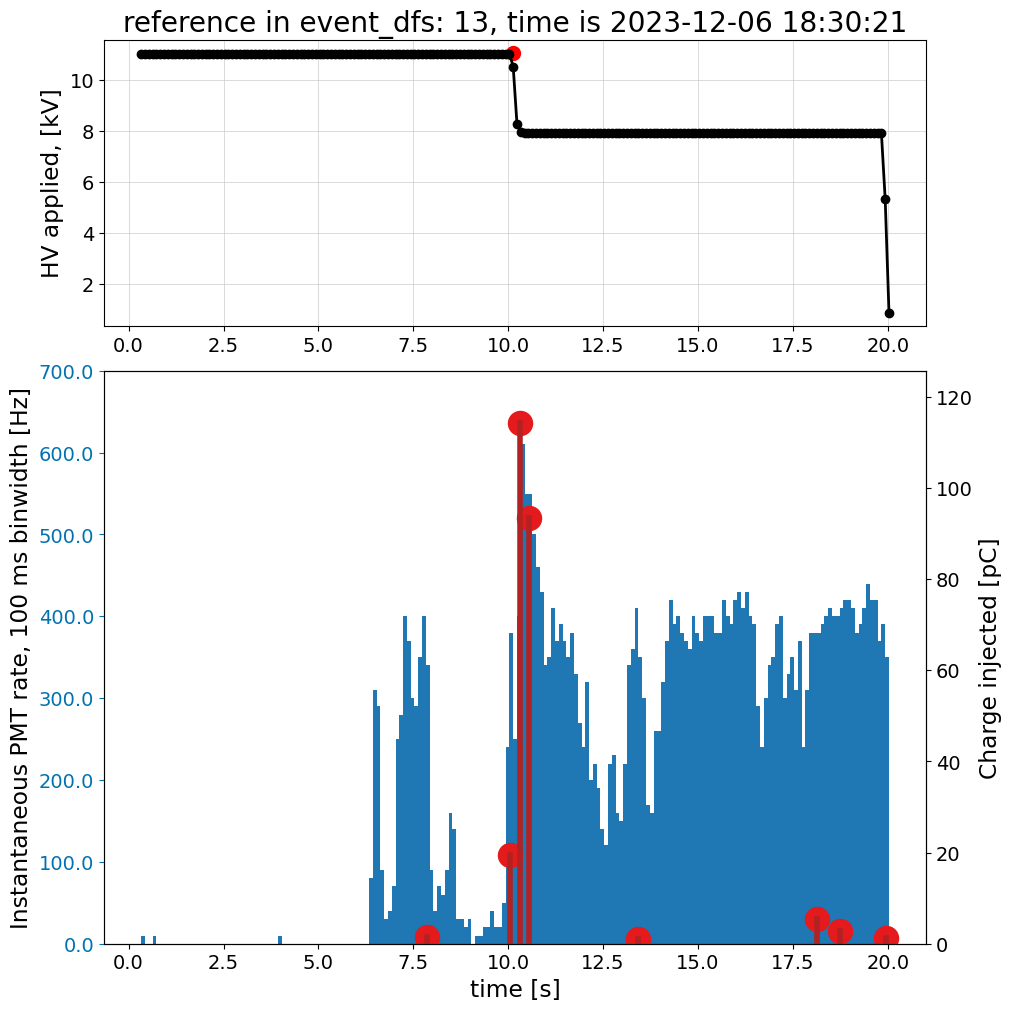

[6.95733418364683, 6.959335234635286, 6.961336285732278, 6.963337336843958, 6.965338387957628, 6.967339439071572, 6.968724562637083, 6.969620255875333, 6.97044962955376, 6.971270027838656, 6.972089211433809, 6.972908230638266, 6.9737272275948206, 6.974546221540445, 6.9753652150785825, 6.976184208561571, 6.976783077735039, 6.976884176262631, 6.976897858486595, 6.976899710177783, 6.976899960777411, 6.976899994692448, 6.976899999282358, 6.9768999999035355, 6.976899999987603, 6.976899999998981, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.97

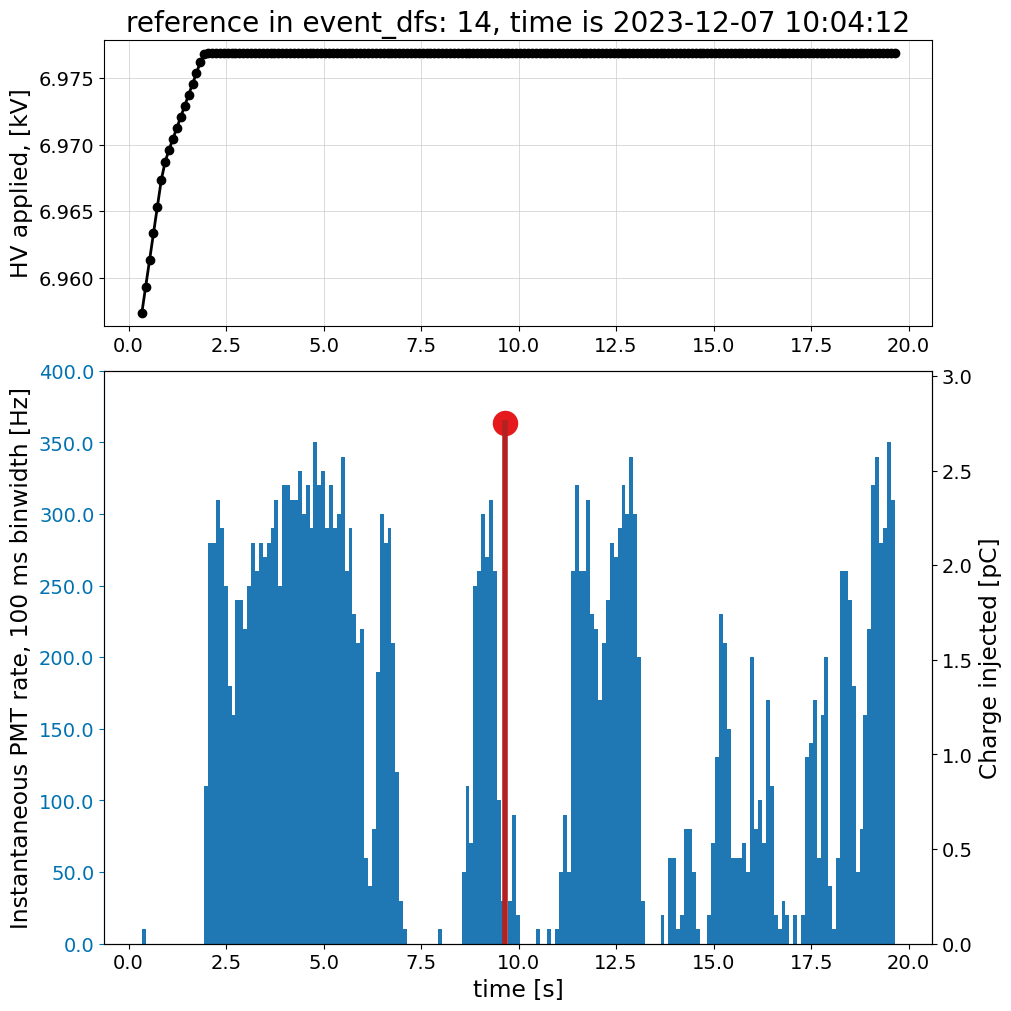

[6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005, 6.9769000000000005,

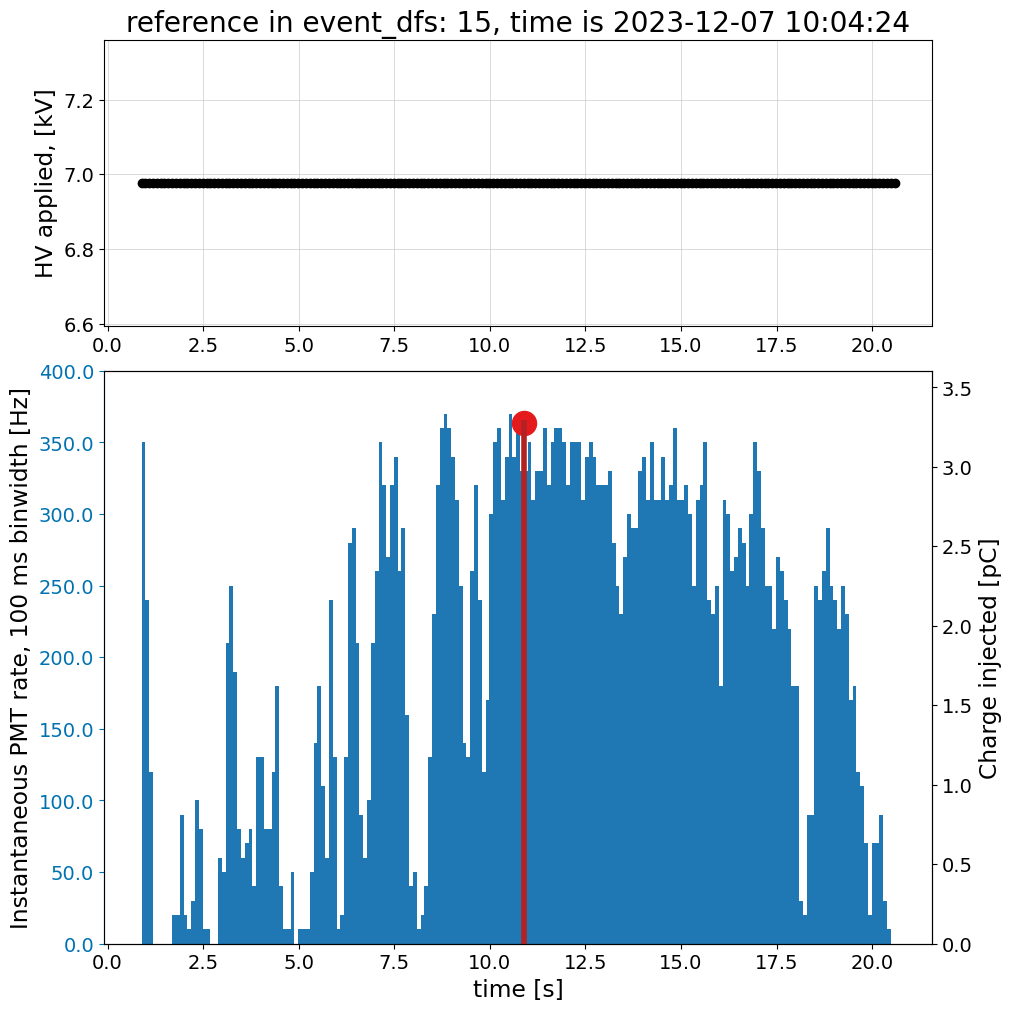

In [11]:
from matplotlib import gridspec
plt.ion()
rate_bin_width = 0.1 #seconds
ana.load_hv_textfiles()
ana.correct_hv_data() #analyzes the ramp data to separate into a list of ramps and a list of flat tops
ana.create_time_duration_map()

#cosmic comparison
cosmic_amps, cosmic_ints = pickle.load(open(cosmic_file, "rb"))


for j in range(len(event_dfs)):
    if(j > 15): break
    ev = event_dfs[j]
    #select events in light channel that have at least some photons in the PMT waveform 
    mask = ((ev["ch0 amp"] - ev["ch0 baseline"]) > 10) | ((ev["ch1 amp"] - ev["ch1 baseline"]) > 10)
    pmt_events = ev[mask]
    #find the charge events in this df of all events
    mask = (np.abs(ev["ch3 charge"]) > 1)
    charge_events = ev[mask]


    #just used to zero the seconds so that we can add nanosecond info
    t0 = np.min([np.min(pmt_events["ch0 seconds"]), np.min(pmt_events["ch1 seconds"]), np.min(charge_events["ch3 seconds"])])

    #properly time zeroed lists with amplitudes matching in index
    pmt_ts = []
    pmt_ts_nonzeroed = []
    pmt_amps = []
    pmt_integrals = []
    charge_ts = []
    charge_amps = [] 

    for i, row in pmt_events.iterrows():
        if(np.isnan(row["ch0 amp"]) == False):
            pmt_ts.append((row["ch0 seconds"] - t0) + row["ch0 nanoseconds"]/1e9)
            pmt_ts_nonzeroed.append(row["ch0 seconds"] + row["ch0 nanoseconds"]/1e9)
            #it is on the todo list to make these hard-coded integration bound times NOT hard coded... in Dataset.py level 
            #Also, the baseline is not being reconstructed well and biases the integral heavily. I'm going to use a mean of the
            #postbaseline and the baseline here. 
            bl = np.mean([row["ch0 baseline"], np.mean(row["ch0 postbaseline"])])
            ch0_int = row["ch0 afterpulse integral"] - 7.48*bl + row["ch0 trigger integral"] - 0.16*bl
            ch0_amp = row["ch0 amp"] - bl
            #find the ch1 row with the same timestamp. they are split up due to intricacies of the coincidence finding function in AnalysisTools
            sel = pmt_events[(pmt_events["ch1 seconds"] == row["ch0 seconds"]) & (np.abs((pmt_events["ch1 nanoseconds"] - row["ch0 nanoseconds"])) < 1000)]
            if(len(sel.index) == 1):
                sel = sel.iloc[0]
                bl = np.mean([sel["ch1 baseline"], np.mean(sel["ch1 postbaseline"])])
                ch1_int = sel["ch1 afterpulse integral"] - 7.48*bl + sel["ch1 trigger integral"] - 0.16*bl
                ch1_amp = sel["ch1 amp"] - bl
                pmt_integrals.append(ch0_int + ch1_int)
                pmt_amps.append(ch1_amp + ch0_amp)
            else:
                pmt_integrals.append(ch0_int)
                pmt_amps.append(ch0_amp)

    for i, row in charge_events.iterrows():
        if(np.isnan(row["ch3 charge"]) == False):
            charge_ts.append((row["ch3 seconds"] - t0) + row["ch3 nanoseconds"]/1e9)
            charge_amps.append(np.abs(row["ch3 charge"]))

 
    fig = plt.figure(layout='constrained')
    gs = fig.add_gridspec(ncols=1,nrows=2, figure=fig, hspace=0, height_ratios=[1, 2])
    axtop = fig.add_subplot(gs[0])
    ax = fig.add_subplot(gs[1])
    ax_amp = ax.twinx()


    time_bounds = [np.min([np.min(pmt_ts), np.min(charge_ts)]), np.max([np.max(pmt_ts), np.max(charge_ts)])]
    bins = np.arange(time_bounds[0], time_bounds[1], rate_bin_width)
    ax.hist(pmt_ts, bins=bins, label="PMT rate")
    for i in range(len(charge_ts)):
        ax_amp.plot([charge_ts[i], charge_ts[i]], [0, charge_amps[i]], color="firebrick", linewidth=4)
        ax_amp.scatter([charge_ts[i]], [charge_amps[i]], color="#e41a1c", s=300)

    ax_amp.set_ylabel("Charge injected [pC]")
    ax.spines['left'].set_color('#0072B2')
    ax.tick_params(axis='y', colors='#0072B2')
    #this block of code converts the histogram to [Hz] instead of counts
    y_vals = ax.get_yticks()
    ax.set_yticks(y_vals)
    ax.set_yticklabels(['{:0.1f}'.format(_ / rate_bin_width) for _ in y_vals])
    ax.set_ylabel("Instantaneous PMT rate, {:.0f} ms binwidth [Hz]".format(1000*rate_bin_width))
    ax.set_xlabel("time [s]")
    ax.grid(False)
    ax_amp.grid(False)
    ax_amp.set_ylim([0, np.max(charge_amps)*1.1])
    axtop.set_title("reference in event_dfs: {:d}".format(j) + ", time is " + str(datetime.fromtimestamp(t0)))

    #plot high voltage on the top subplot
    tempbins = np.arange(np.min(pmt_ts_nonzeroed), np.max(pmt_ts_nonzeroed), rate_bin_width)
    hvs = [ana.get_hv_at_time(_) for _ in tempbins]
    print (hvs)
    axtop.plot(np.array(tempbins) - t0, hvs, 'ko-')
    axtop.set_xlim(ax.get_xlim())

    #plot gevents on this HV plot as well
    gdf = ana.get_gevents_in_window(np.min(pmt_ts_nonzeroed), np.max(pmt_ts_nonzeroed))
    axtop.scatter(gdf["t"] - t0, gdf["v_app"], color="red", s=100)
    axtop.set_ylabel("HV applied, [kV]")

    plt.show()

In [12]:
ana = anas[7]
df7 = ana.df
#df7 = df7[~df7["ch3 charge"].isna()]

0


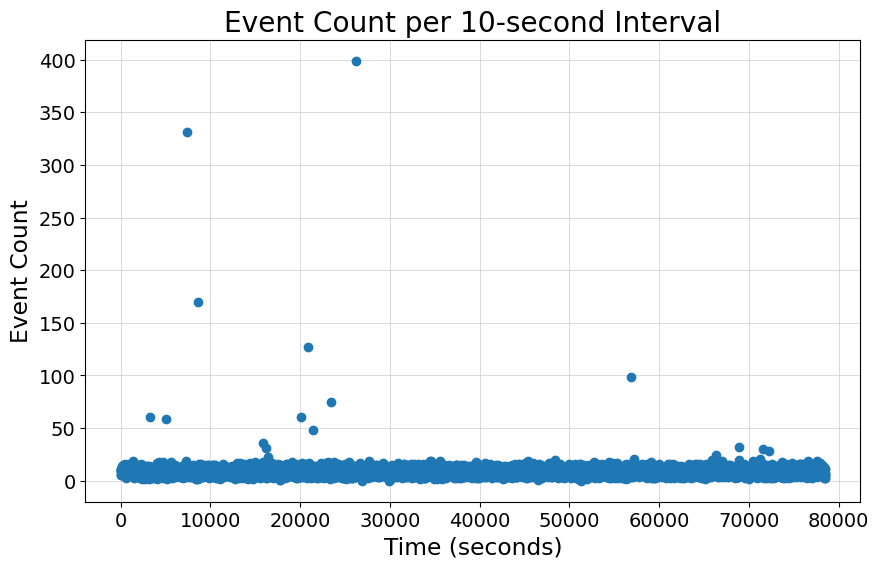

In [13]:
min_t_sec = np.min(df7["ch0 seconds"]) #to be able to do easier time computations in the nanoseconds regime
df7["ch0 tzerod"] = (df7["ch0 seconds"] - min_t_sec) + df7["ch0 nanoseconds"]/1e9
df7 = df7.sort_values(by="ch0 tzerod")
dTs = []
#there are breaks in the data, where either the dataset 
#is changed over or there are charge events. this is the cutoff for including
#the time difference in the list
time_thresh = 50 #seconds
last_t = None
for i, (_, row) in enumerate(df7.iterrows()):
    if(i == 0): 
        last_t = row["ch0 tzerod"]
        continue
    dt = row["ch0 tzerod"] - last_t
    if(dt <= time_thresh):
        dTs.append(dt)
    last_t = row["ch0 tzerod"]

normed_event_times = [0]
print (normed_event_times[-1])
for i in range(len(dTs)):
    normed_event_times.append(normed_event_times[-1] + dTs[i])

dur = 10 #seconds
inter = [0, dur]
nev = []
abs_intervals = []

while True:
    if(inter[1] > np.max(normed_event_times)):
        break
    #get index of closest value to lower interval bound
    idx = np.argmin(np.abs(np.array(normed_event_times) - inter[0]))
    count = 0
    while True:
        if(normed_event_times[idx] > inter[1]):
            break
        count += 1
        idx += 1
    nev.append(count)
    abs_intervals.append(inter[0])

    inter[0] += dur
    inter[1] += dur

abs_intervals.append(inter[0] + min_t_sec)

# Create a list of time intervals for plotting
time_intervals = [i * dur for i in range(len(nev))]

# Plot the event counts over time intervals
plt.figure(figsize=(10, 6))
plt.scatter(abs_intervals[:-1], nev, marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Count')
plt.title('Event Count per 10-second Interval')
plt.grid(True)
plt.show()

In [18]:
from scipy.stats import poisson

# Calculate the minimum time (in seconds) for normalization
min_t_sec = np.min(df7["ch0 seconds"])
df7.loc[:, "ch0 tzerod"] = (df7["ch0 seconds"] - min_t_sec) + df7["ch0 nanoseconds"] / 1e9

df7 = df7.sort_values(by="ch0 tzerod")

# Calculate the absolute time
df7.loc[:, "abs_time"] = df7["ch0 seconds"] + df7["ch0 nanoseconds"] / 1e9


# Calculate the number of events in each 10-second interval
dur = 10 # seconds
start_time = df7["abs_time"].min()
end_time = df7["abs_time"].max()
bins = np.arange(start_time, end_time + dur, dur)

# Calculate the 99.9% confidence interval using Poisson distribution
lambda_value = 8.8
confidence_level = 0.999
interval = poisson.interval(confidence_level, lambda_value)
upper_limit = interval[1]
down_limit = interval[0]

df7['interval'] = pd.cut(df7["abs_time"], bins, right=False)

# Calculate the number of events in each interval
event_counts = df7.groupby('interval', observed=False).size()

# Find the start times of intervals where event count exceeds the upper limit
exceed_intervals = event_counts[event_counts > upper_limit].index

# Extract the left edge (start times) of these intervals
exceed_times = [(interval.left, event_counts[interval])for interval in exceed_intervals]



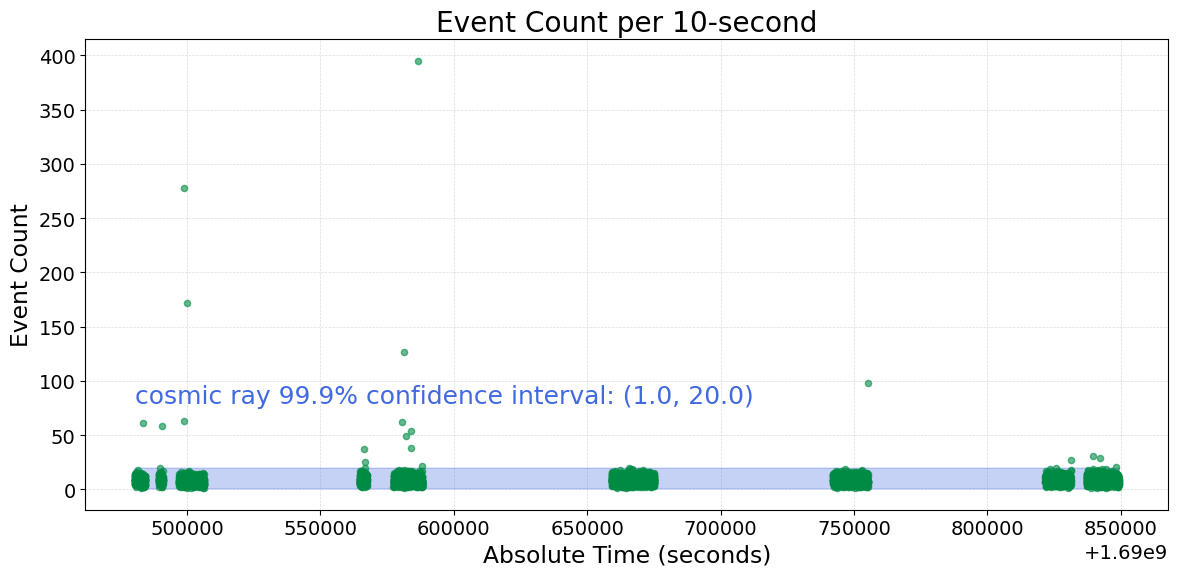

Times with event count exceeding upper limit: [(1690483652.786, 61), (1690490582.786, 58), (1690499022.786, 278), (1690499032.786, 63), (1690500192.786, 172), (1690566332.786, 37), (1690566672.786, 25), (1690580562.786, 62), (1690581312.786, 127), (1690581922.786, 49), (1690583942.786, 38), (1690583952.786, 54), (1690586672.786, 395), (1690588082.786, 22), (1690755102.786, 98), (1690831132.786, 27), (1690839642.786, 31), (1690842282.786, 29), (1690848272.786, 21)]


In [19]:
# Remove intervals with zero events
filtered_intervals = event_counts[event_counts != 0].index.categories.left.values[event_counts[event_counts != 0].index.codes]
filtered_nev = event_counts[event_counts != 0].values

# Plot the event count over time
plt.figure(figsize=(12, 6))

# Fill the area between the confidence interval limits
plt.fill_between(filtered_intervals, down_limit, upper_limit, color='#4169E1', alpha=0.3)

# Plot the event counts
plt.scatter(filtered_intervals, filtered_nev, marker='o', s=20, c='#008B45', alpha=0.6)

# Add annotation with confidence interval information
plt.text(start_time, 80, f'cosmic ray {confidence_level * 100}% confidence interval: {interval}', fontsize=18, color='#4169E1')

# Set labels and title
plt.xlabel('Absolute Time (seconds)')
plt.ylabel('Event Count')
plt.title('Event Count per 10-second')
plt.grid(True, linestyle= '--', alpha=0.7)
plt.tight_layout()
#plt.ylim([0, 40])
plt.show()

# Print the times with event count exceeding the upper limit
print("Times with event count exceeding upper limit:", exceed_times)


In [20]:
print (len(exceed_times))
print (exceed_times)

19
[(1690483652.786, 61), (1690490582.786, 58), (1690499022.786, 278), (1690499032.786, 63), (1690500192.786, 172), (1690566332.786, 37), (1690566672.786, 25), (1690580562.786, 62), (1690581312.786, 127), (1690581922.786, 49), (1690583942.786, 38), (1690583952.786, 54), (1690586672.786, 395), (1690588082.786, 22), (1690755102.786, 98), (1690831132.786, 27), (1690839642.786, 31), (1690842282.786, 29), (1690848272.786, 21)]


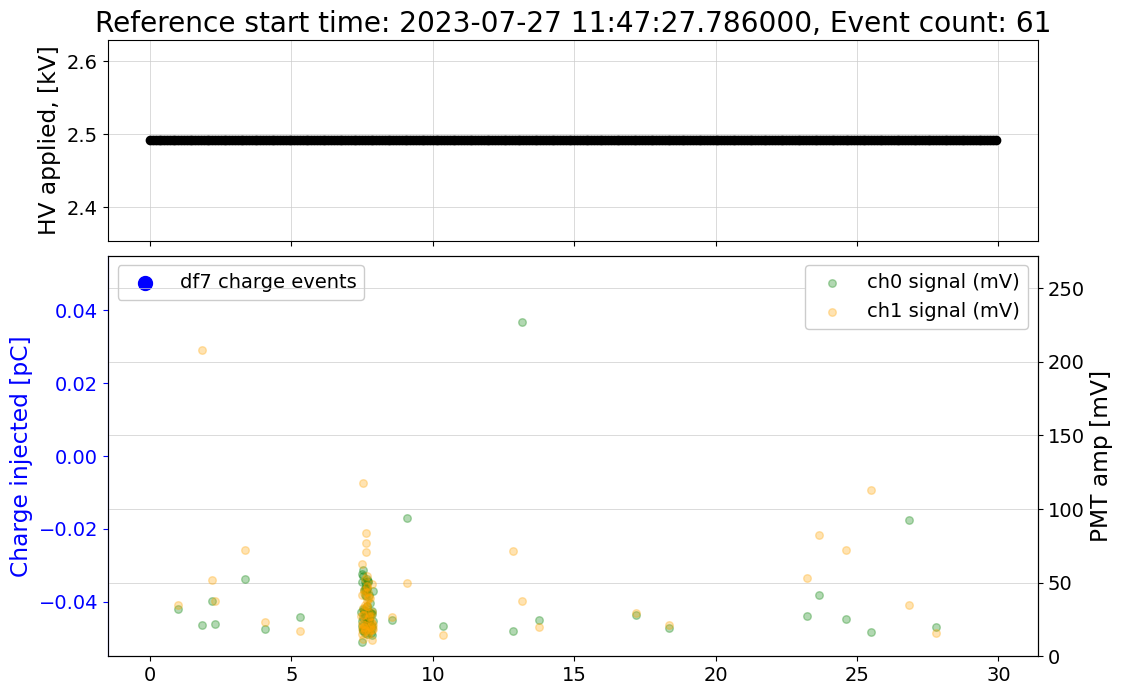

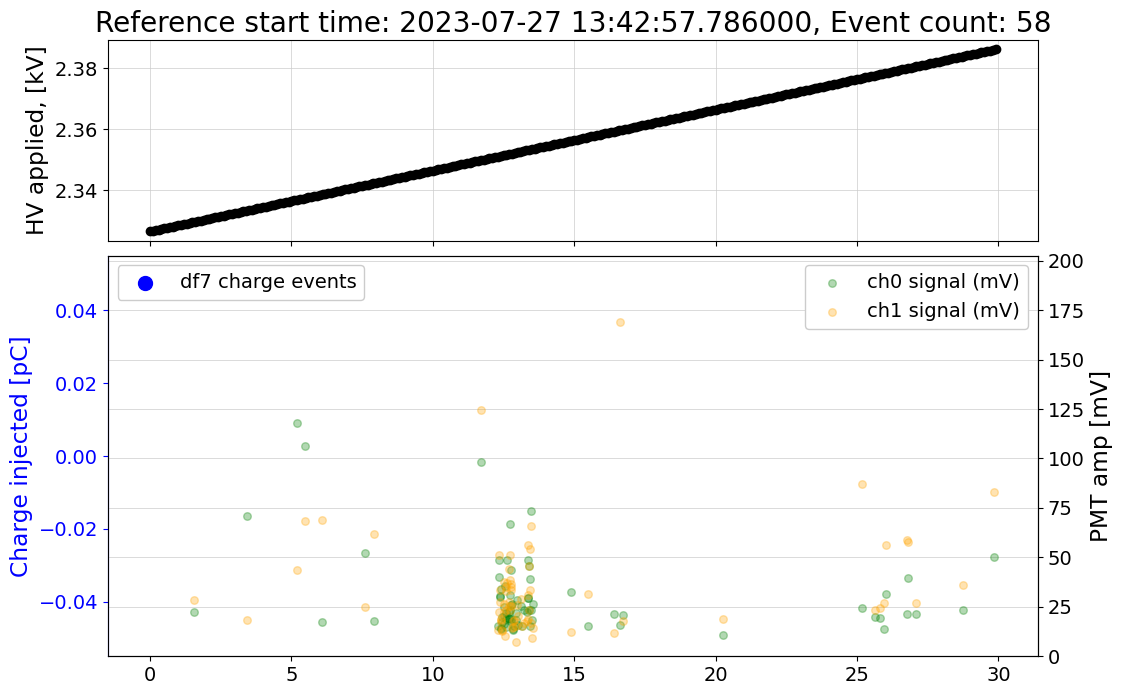

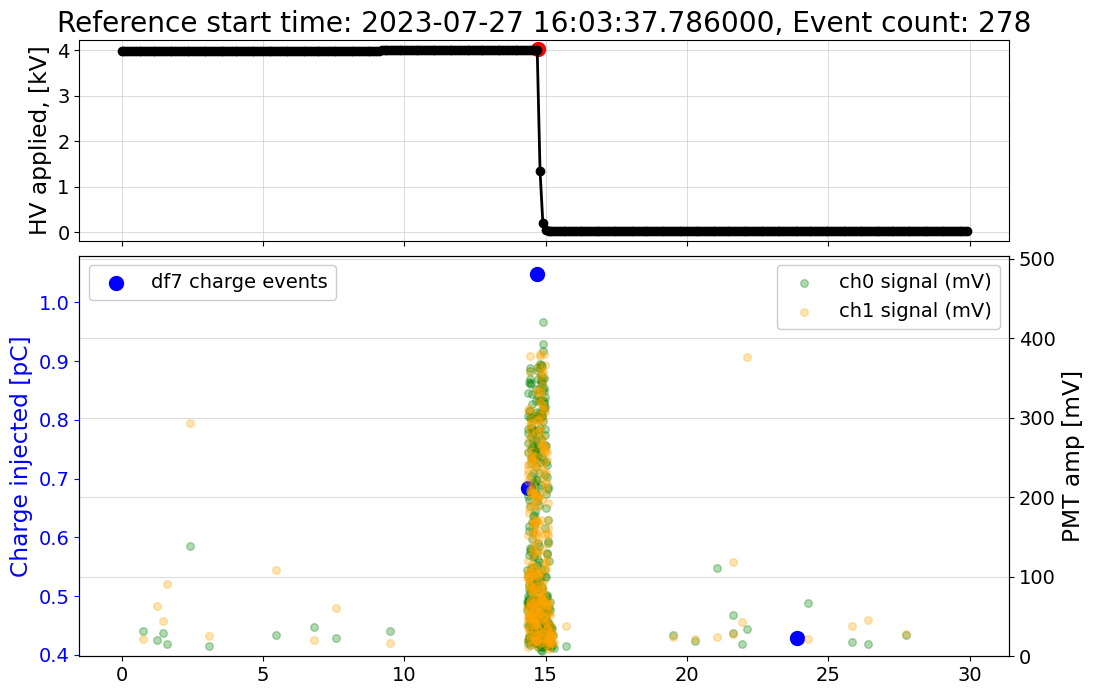

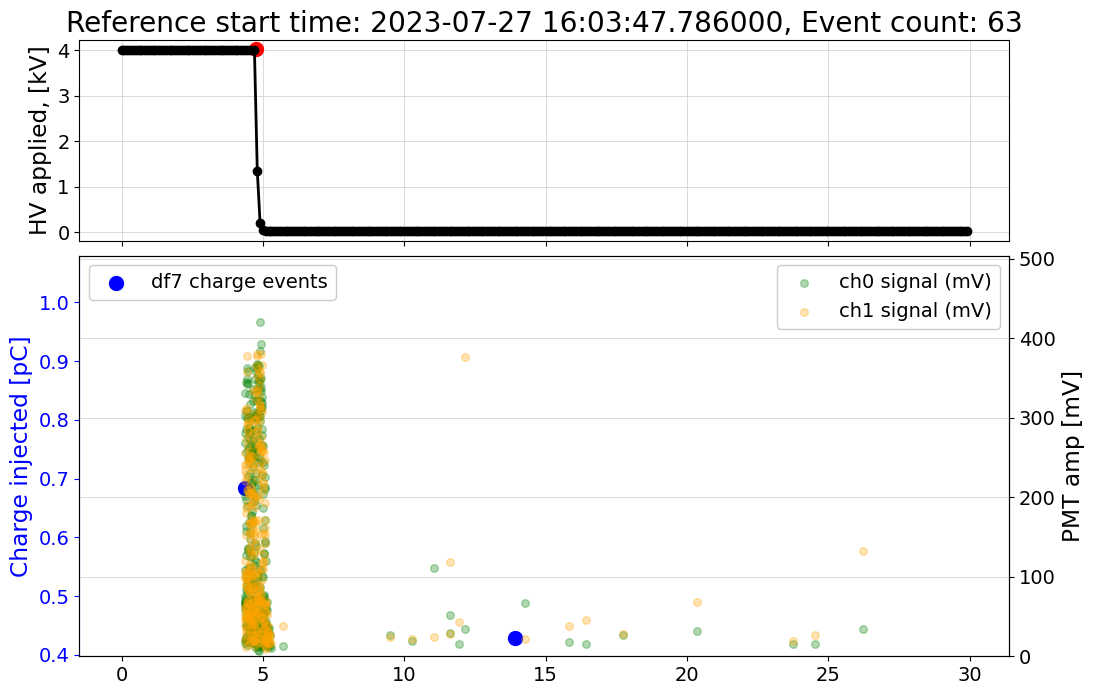

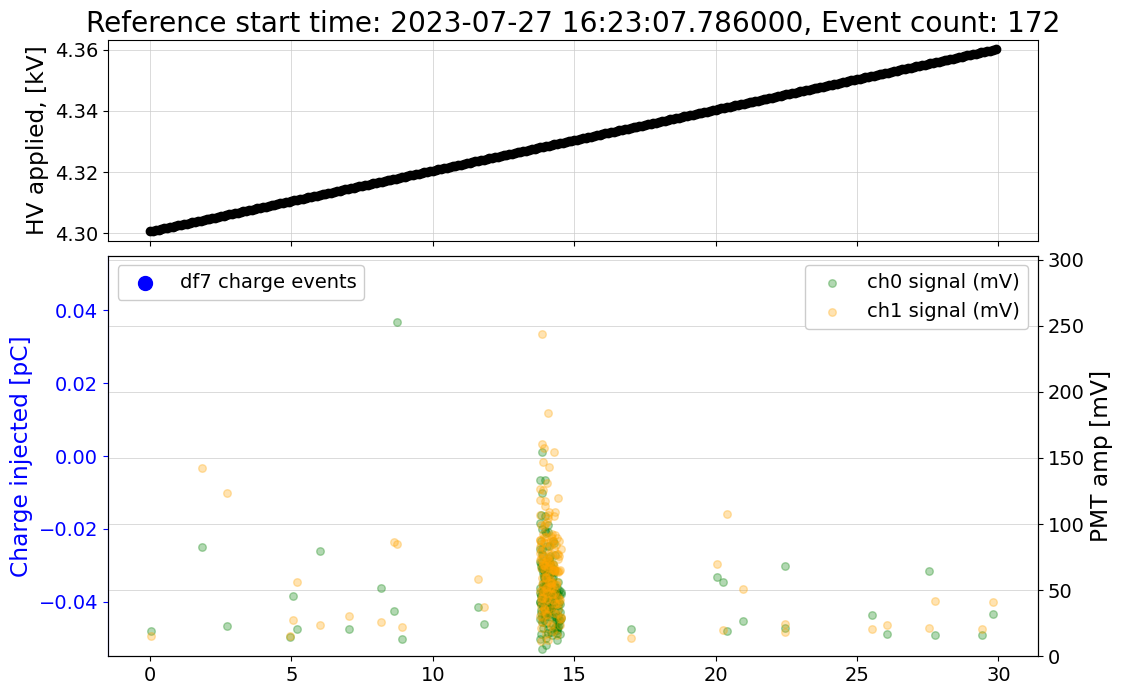

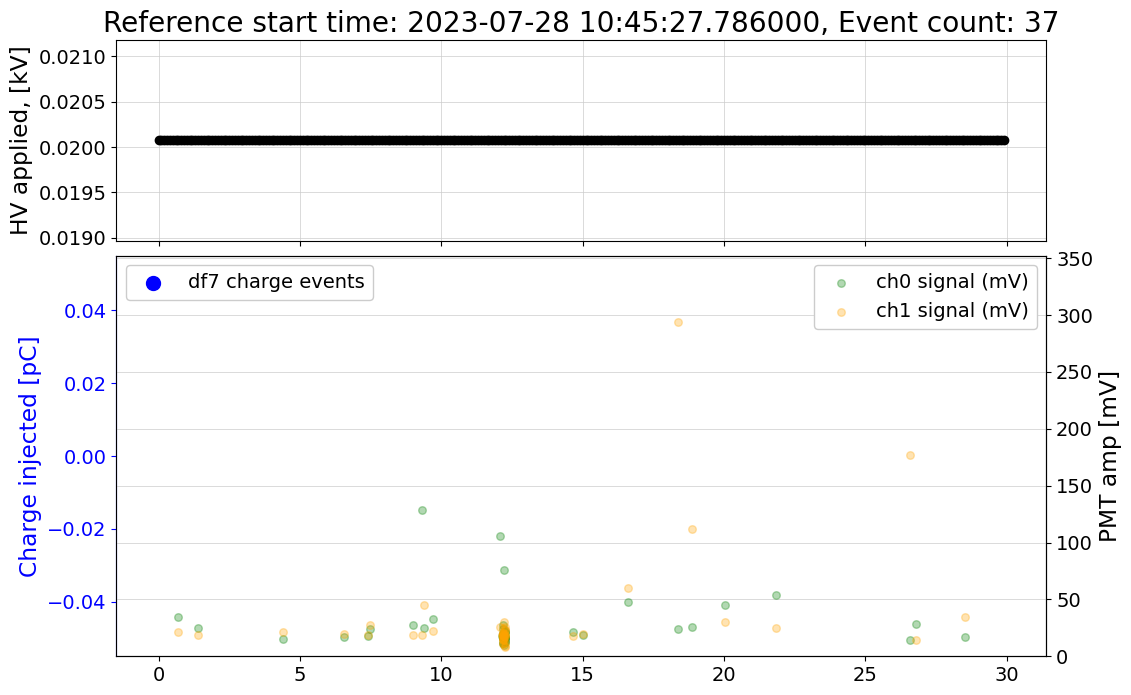

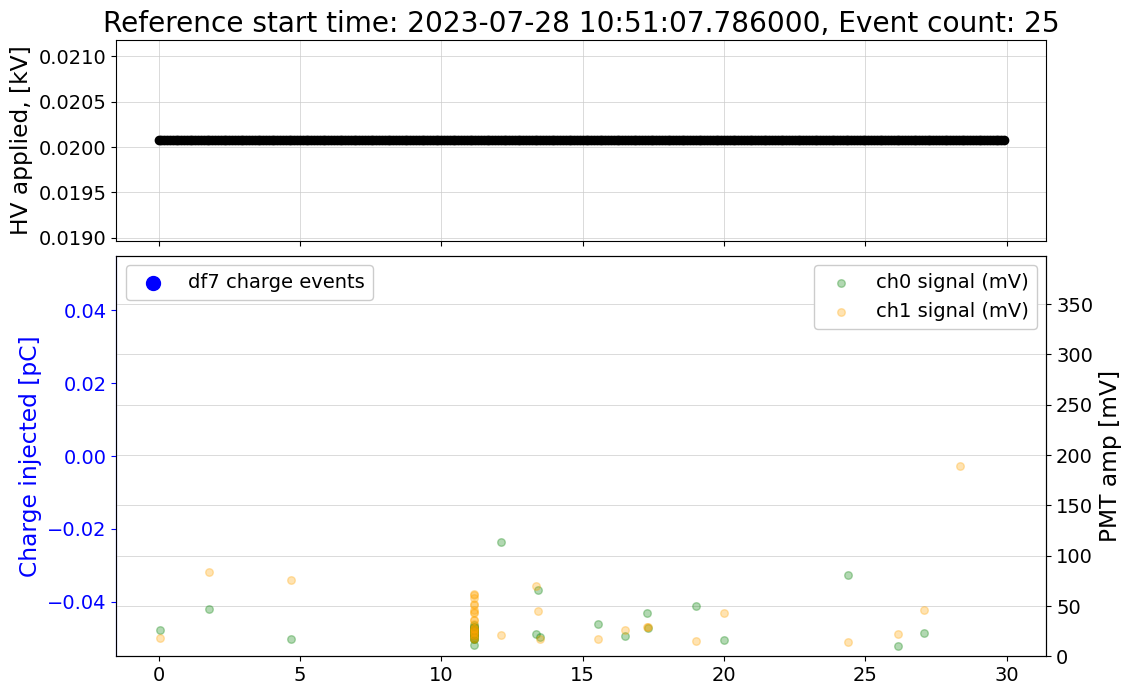

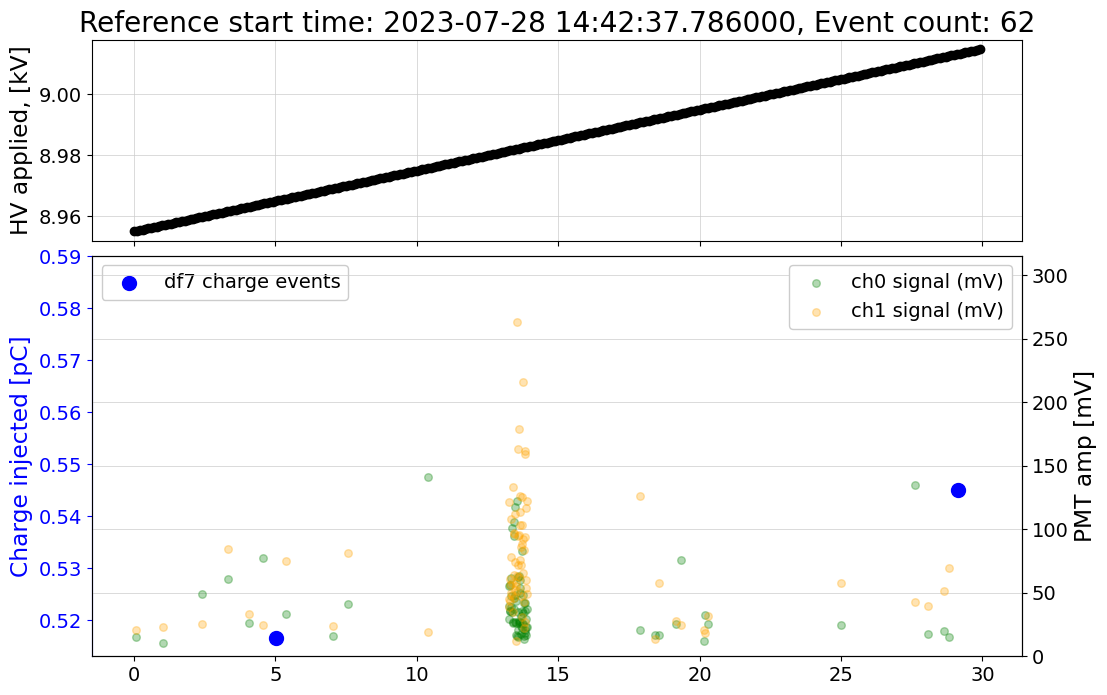

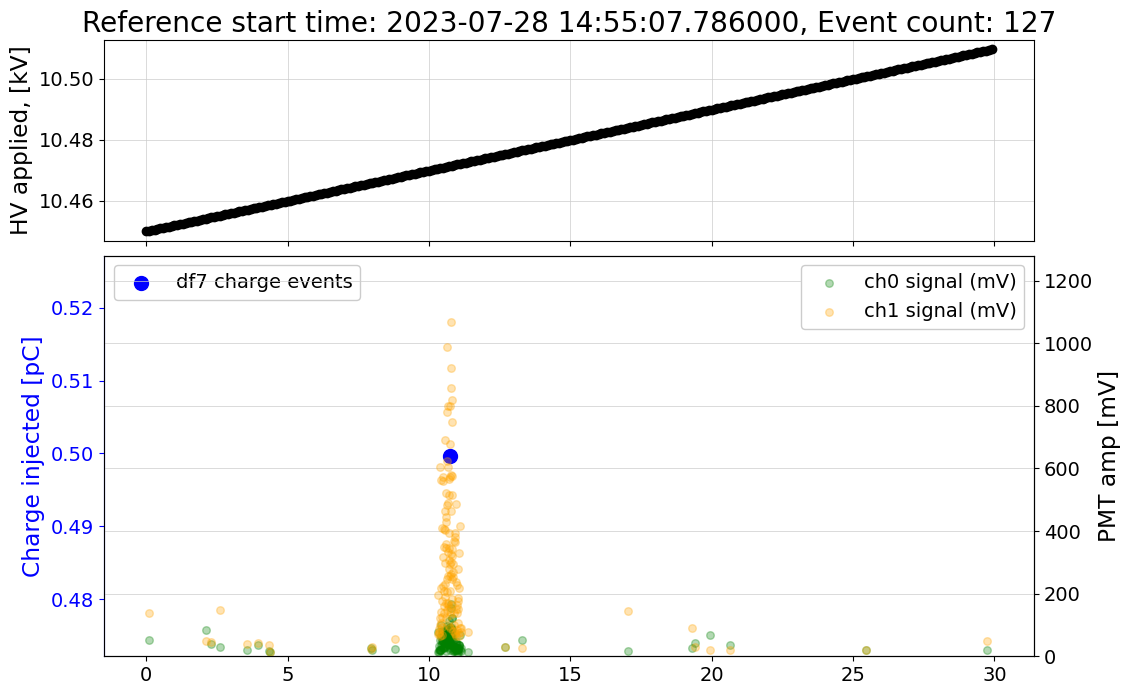

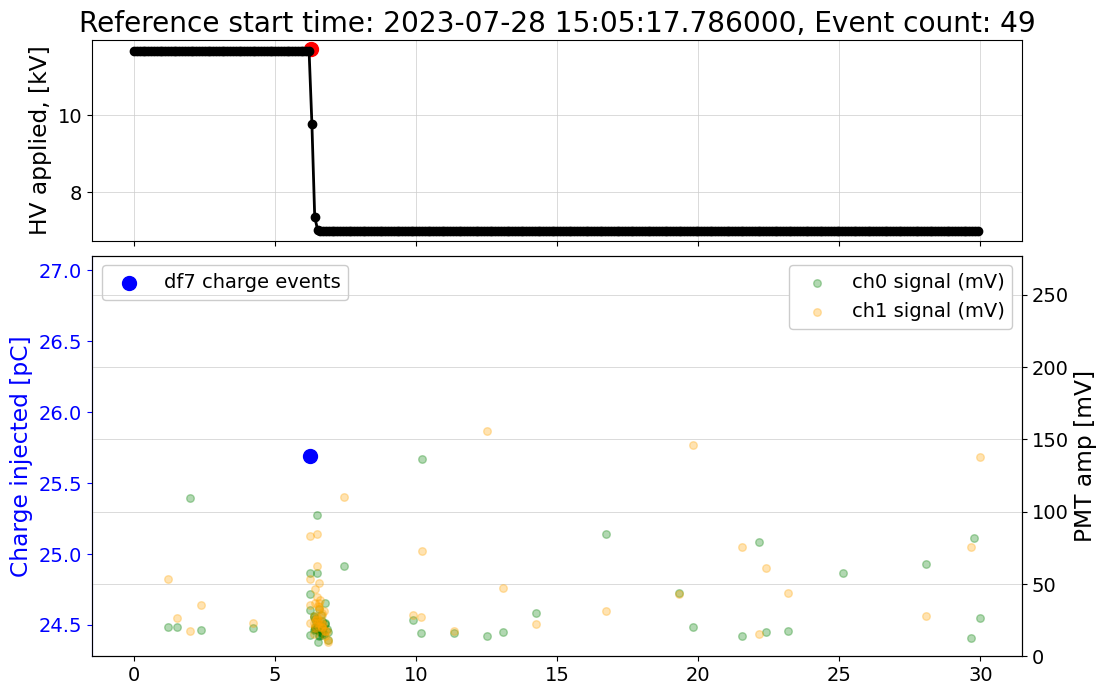

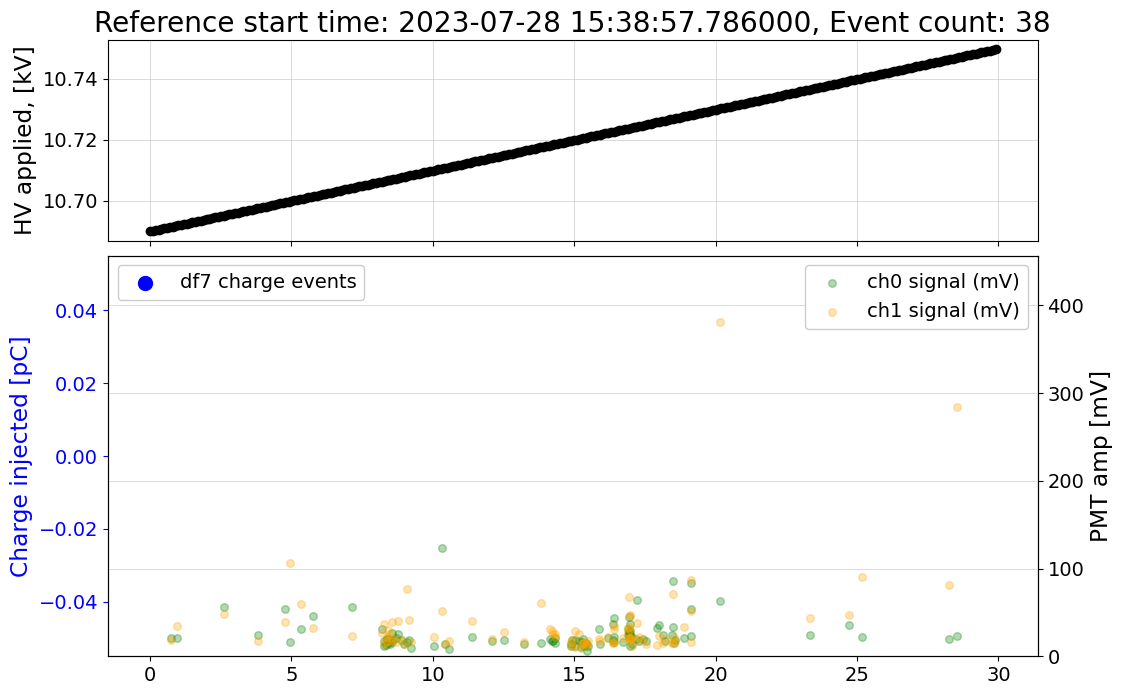

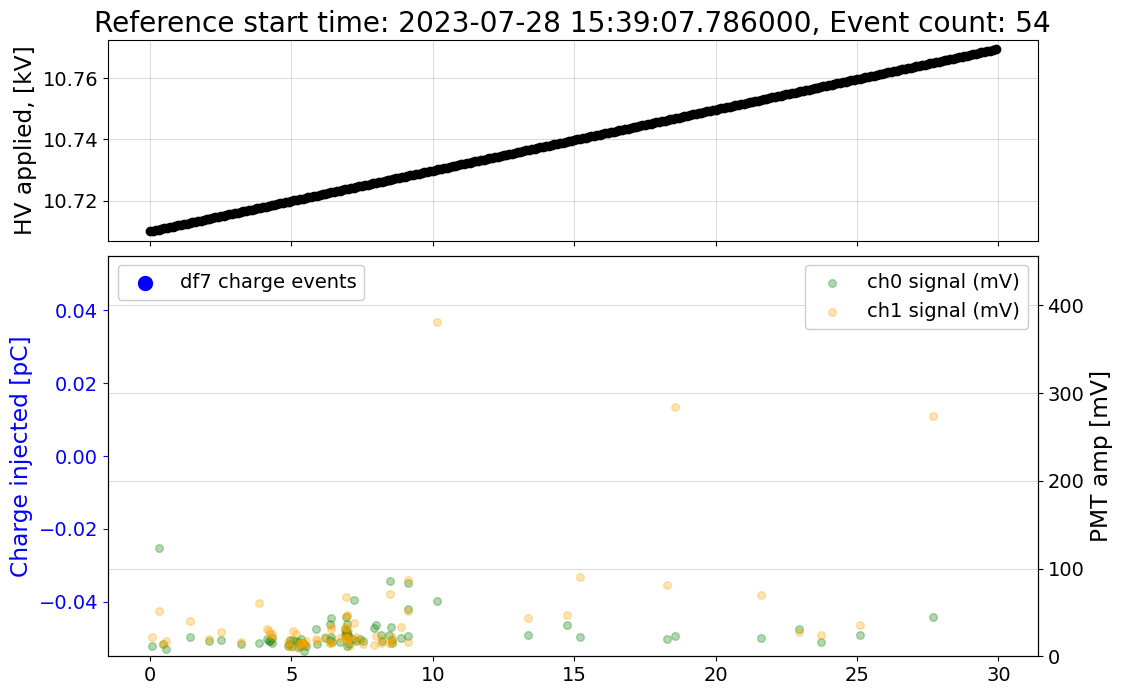

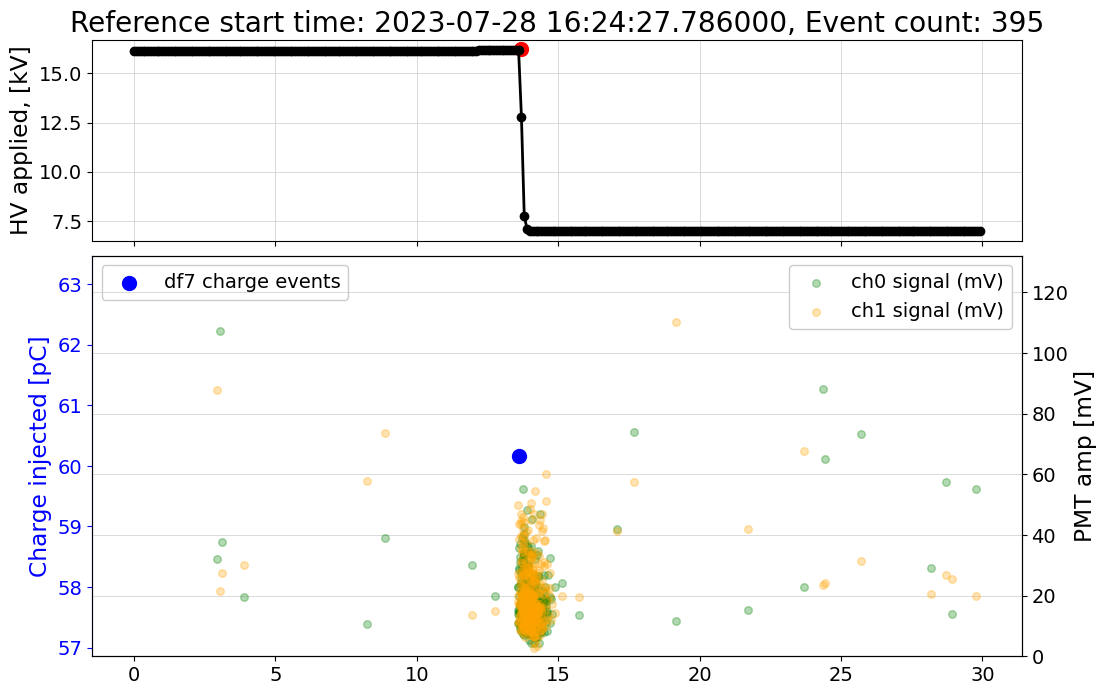

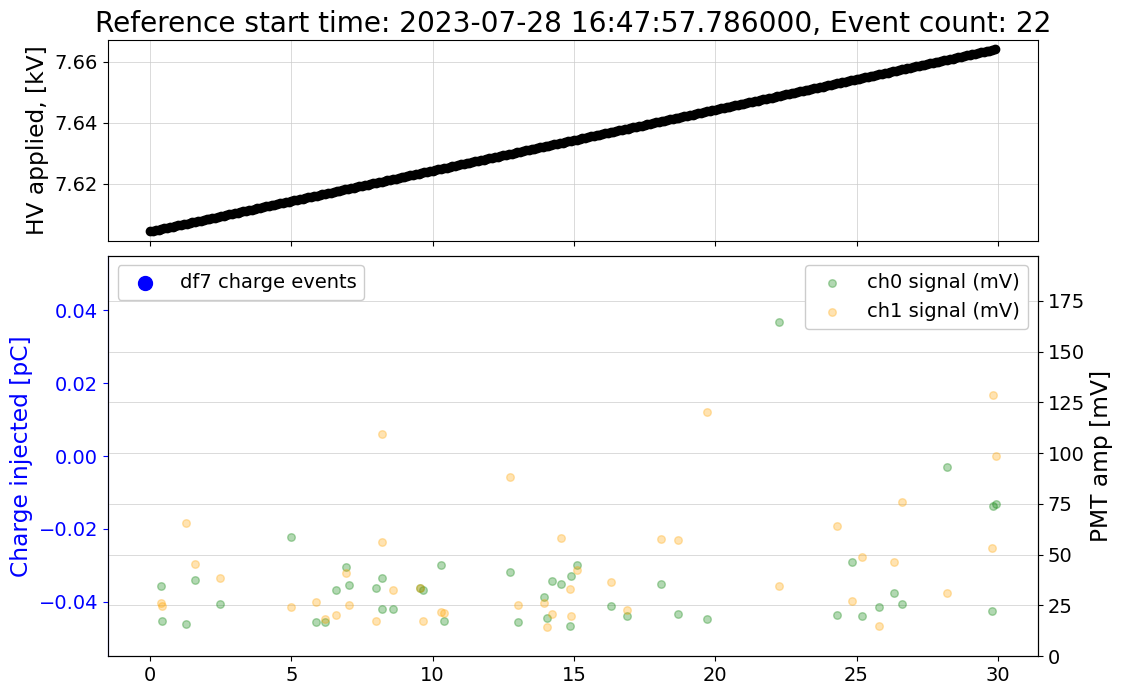

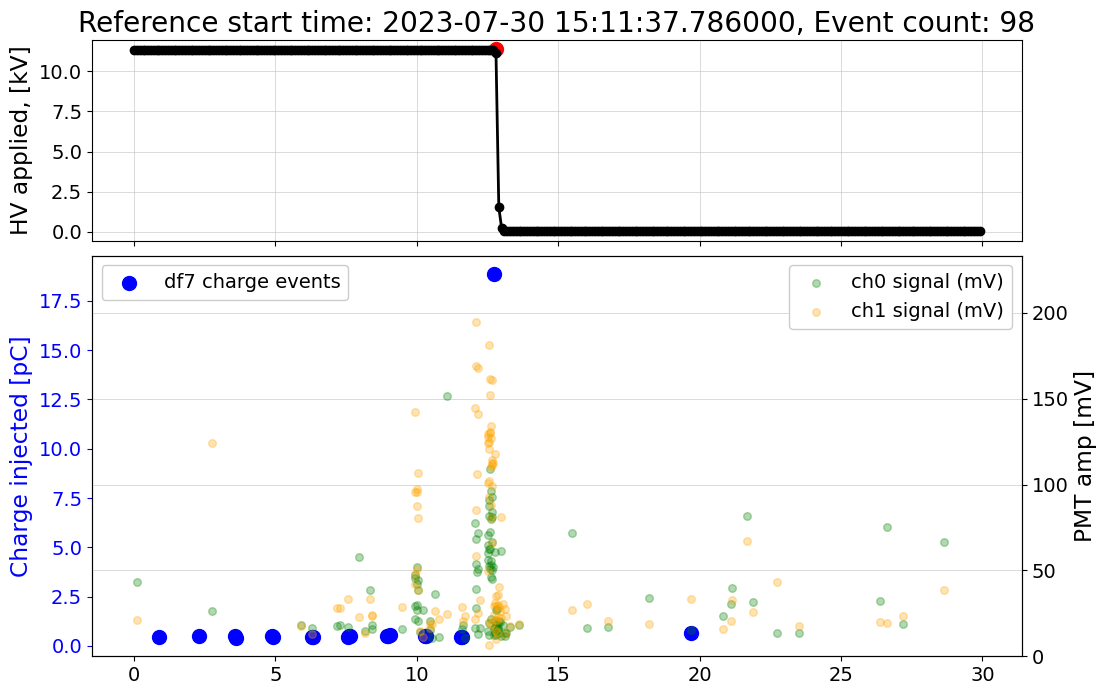

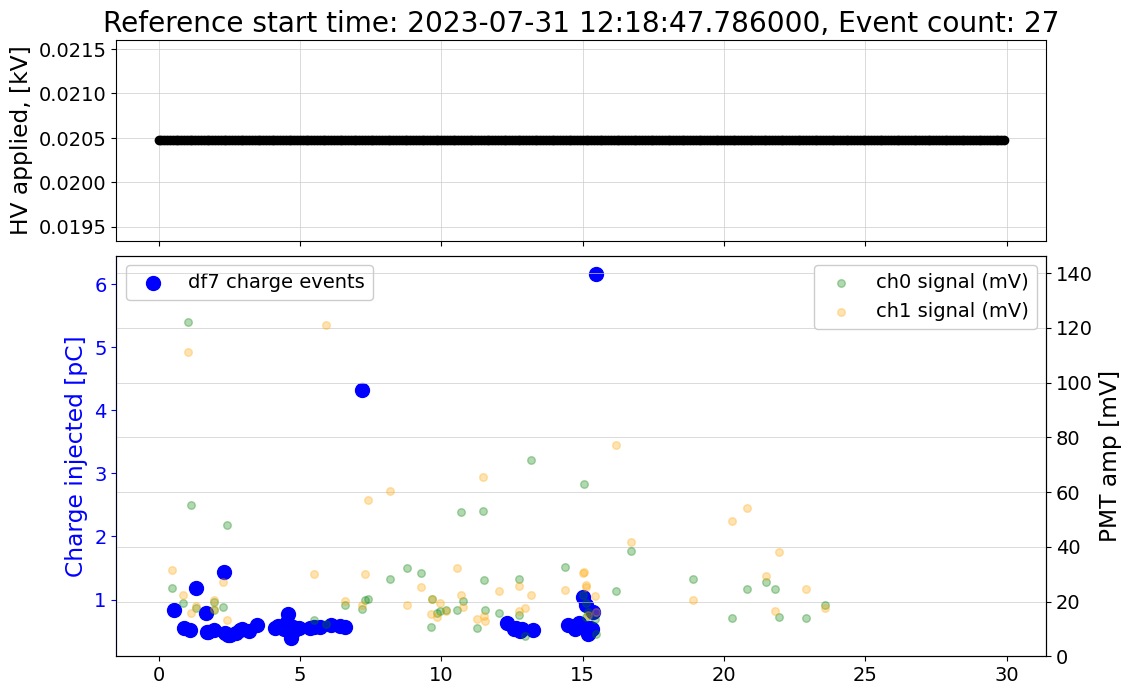

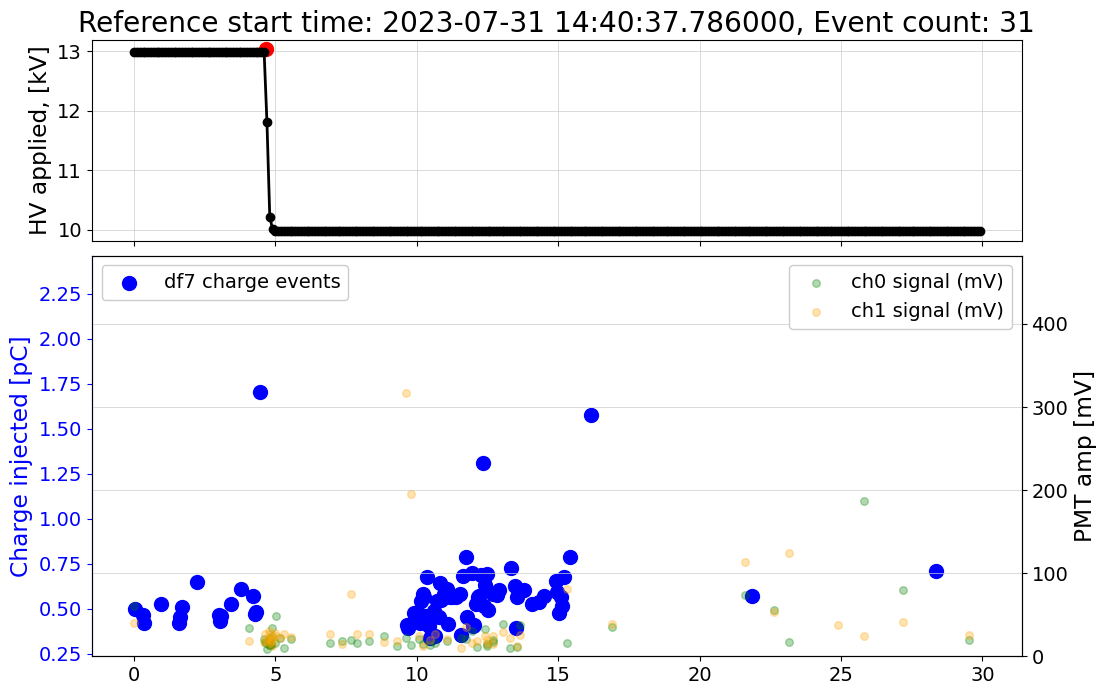

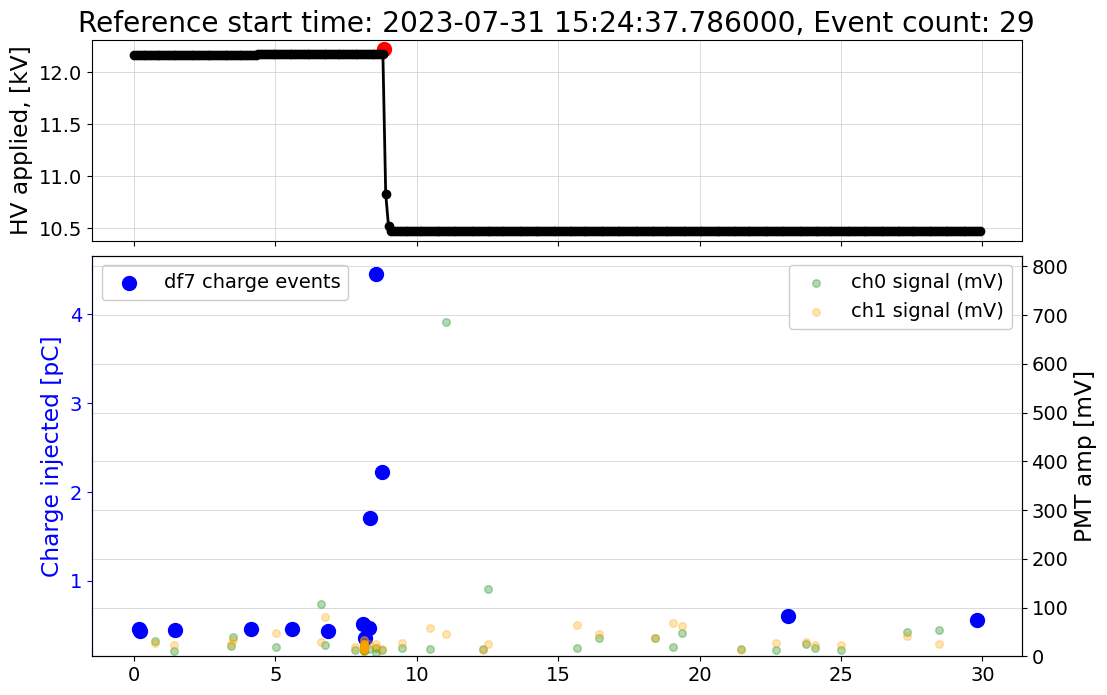

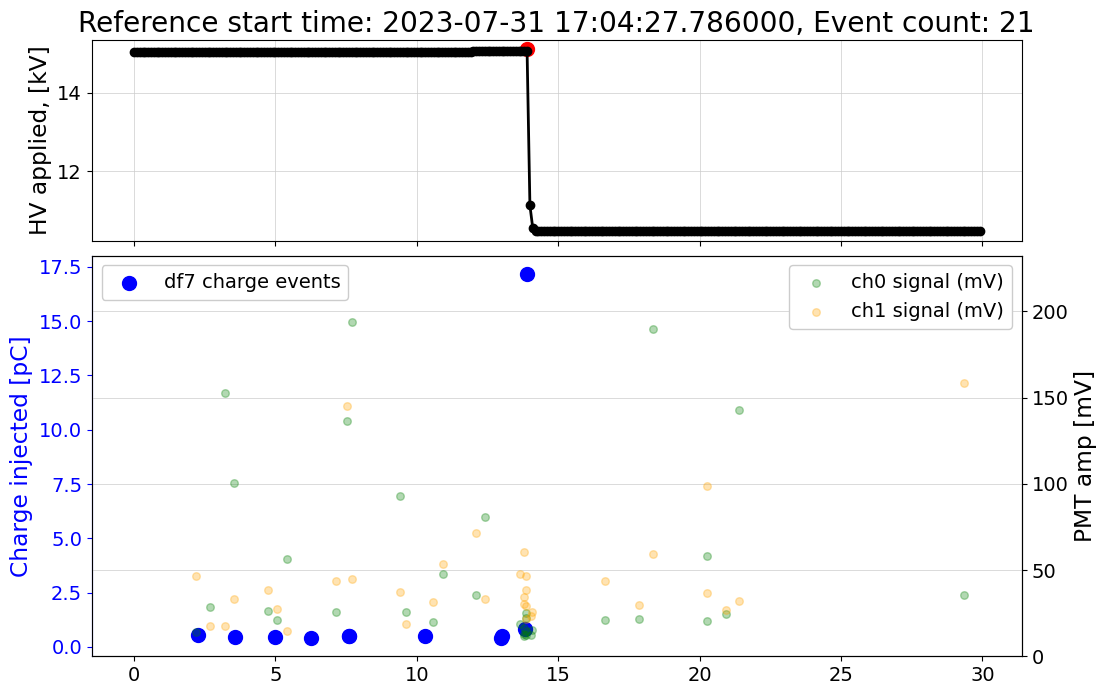

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load and process data
ana.load_hv_textfiles()
ana.correct_hv_data()  # Analyzes the ramp data to separate into a list of ramps and a list of flat tops
ana.create_time_duration_map()

# Filter data
df7_filtered = df7.dropna(subset=["ch3 charge"])
mask = np.abs(df7_filtered["ch3 charge"]) > 0.1
df7_charge_events = df7_filtered[mask].copy()
df7_charge_events["ch3 abs_time"] = df7_charge_events["ch3 seconds"] + df7_charge_events["ch3 nanoseconds"] / 1e9

# Plot the event count over time for each exceed time
for start, count in exceed_times:
    # Define the time window
    time_window_start = start - 5
    time_window_end = start + 25

    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1, 2], hspace=0.05)

    ax_top = fig.add_subplot(gs[0])
    ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)
    
    time_bounds = [time_window_start, time_window_end]

    # Plot high voltage on the top subplot
    tempbins = np.arange(time_window_start, time_window_end, 0.1)
    hvs = [ana.get_hv_at_time(_) for _ in tempbins]

    # Normalize tempbins to start from 0
    tempbins_normalized = tempbins - time_window_start

    # Plot HV data
    ax_top.plot(tempbins_normalized, hvs, 'ko-')

    # Plot gevents on this HV plot as well
    gdf = ana.get_gevents_in_window(time_window_start, time_window_end)
    gdf = gdf.copy()  # Make a copy to avoid SettingWithCopyWarning
    gdf["normalized_time"] = gdf["t"] - time_window_start
    ax_top.scatter(gdf["normalized_time"], gdf["v_app"], color="red", s=100)

    ax_top.set_ylabel("HV applied, [kV]")
    ax_top.set_title(f"Reference start time: {datetime.fromtimestamp(time_window_start)}, Event count: {count}")

    # Plot charge data on the bottom subplot
    mask = (df7_charge_events["ch3 abs_time"] >= time_window_start) & (df7_charge_events["ch3 abs_time"] <= time_window_end)
    df7_charge_events_time = df7_charge_events[mask].copy()

    # 使用 np.nan_to_num 处理无穷大值
    df7_charge_events_time["ch3 charge"] = np.nan_to_num(np.abs(df7_charge_events_time["ch3 charge"]), nan=np.nan, posinf=np.nan, neginf=np.nan)
    max_charge = df7_charge_events_time["ch3 charge"].dropna().max()

    ax_bottom.scatter(df7_charge_events_time["ch3 abs_time"] - time_window_start, np.abs(df7_charge_events_time["ch3 charge"]), color="blue", s=100, label="df7 charge events")

    # Plot light channel data on the bottom subplot (ch0)
    mask_ch0 = (df7["ch0 seconds"] + df7["ch0 nanoseconds"] / 1e9 >= time_bounds[0]) & (df7["ch0 seconds"] + df7["ch0 nanoseconds"] / 1e9 <= time_bounds[1])
    df7_ch0_events = df7[mask_ch0].copy()
    df7_ch0_events["ch0 abs_time"] = df7_ch0_events["ch0 seconds"] + df7["ch0 nanoseconds"] / 1e9
    df7_ch0_events = df7_ch0_events.sort_values(by="ch0 abs_time")
    df7_ch0_events["ch0 signal"] = df7_ch0_events["ch0 amp"] - df7_ch0_events["ch0 baseline"]

    # Plot light channel data on the bottom subplot (ch1)
    mask_ch1 = (df7["ch1 seconds"] + df7["ch1 nanoseconds"] / 1e9 >= time_bounds[0]) & (df7["ch1 seconds"] + df7["ch1 nanoseconds"] / 1e9 <= time_bounds[1])
    df7_ch1_events = df7[mask_ch1].copy()
    df7_ch1_events["ch1 abs_time"] = df7_ch1_events["ch1 seconds"] + df7["ch1 nanoseconds"] / 1e9
    df7_ch1_events = df7_ch1_events.sort_values(by="ch1 abs_time")
    df7_ch1_events["ch1 signal"] = df7_ch1_events["ch1 amp"] - df7_ch1_events["ch1 baseline"]

    # Scatter plot for ch0 and ch1 signal with transparency
    ax2 = ax_bottom.twinx()
    ax2.scatter(df7_ch0_events["ch0 abs_time"] - time_window_start, df7_ch0_events["ch0 signal"], color="green", s=30, alpha=0.3, label="ch0 signal (mV)")
    ax2.scatter(df7_ch1_events["ch1 abs_time"] - time_window_start, df7_ch1_events["ch1 signal"], color="orange", s=30, alpha=0.3, label="ch1 signal (mV)")


    # Set y-axis limits based on the maximum value of ch0 and ch1 signals
    max_signal = max(df7_ch0_events["ch0 signal"].max(), df7_ch1_events["ch1 signal"].max())
    if pd.notna(max_signal):
        ax2.set_ylim([0, max_signal * 1.2])

    # Set left y-axis to blue
    ax_bottom.spines['left'].set_color('blue')
    ax_bottom.yaxis.label.set_color('blue')
    ax_bottom.tick_params(axis='y', colors='blue')
    ax_bottom.set_ylabel("Charge injected [pC]")

    # Set right y-axis label
    ax2.set_ylabel("PMT amp [mV]")

    # Customize grid for the bottom subplot
    ax_bottom.grid(False)

    ax_bottom.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Remove x-axis labels from the top subplot
    plt.setp(ax_top.get_xticklabels(), visible=False)

    plt.show()


In [141]:
print (df7["ch3 charge"])

0       -0.463318
1       -0.468509
2       -0.504848
3       -0.429575
4       -0.445149
           ...   
74448   -0.459425
74449   -0.472403
74450    0.459425
74451   -0.404917
74452   -0.578823
Name: ch3 charge, Length: 74453, dtype: object


/var/folders/d4/y586fgfx5lj9wx20byzd3kzw0000gn/T/ipykernel_13497/1074562163.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_counts = df7.groupby('interval').size()


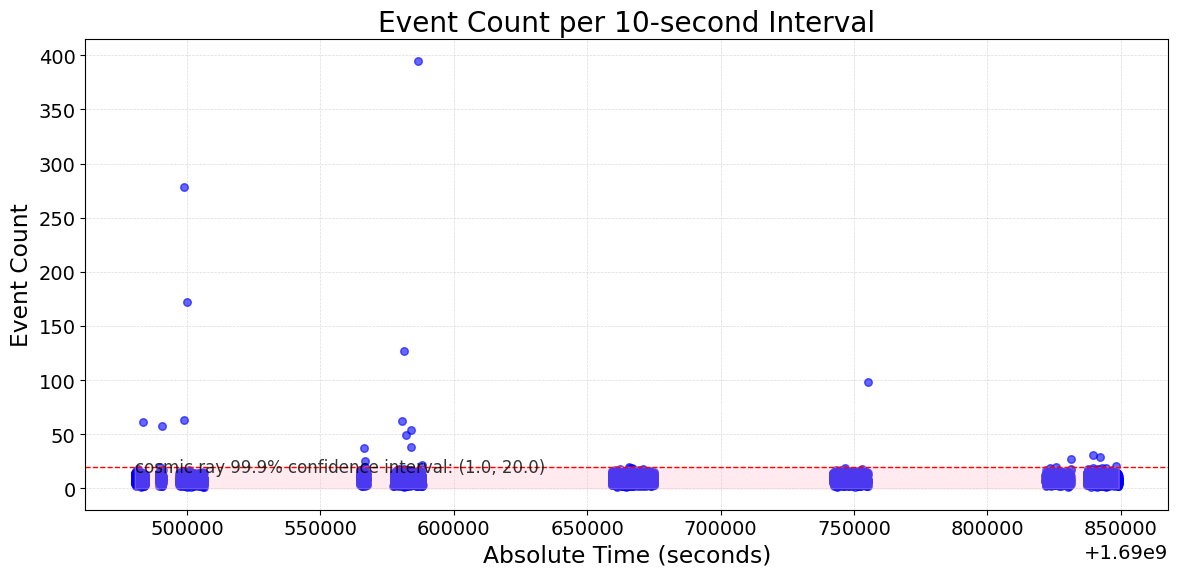

Times with event count exceeding upper limit: [1.69048037e+09 1.69048038e+09 1.69048039e+09 ... 1.69084918e+09
 1.69084919e+09 1.69084920e+09]


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 假设 df7 是你的数据框，包含 "ch0 seconds" 和 "ch0 nanoseconds" 列

# 计算最小时间（秒），用于归一化时间
min_t_sec = np.min(df7["ch0 seconds"])
df7["ch0 tzerod"] = (df7["ch0 seconds"] - min_t_sec) + df7["ch0 nanoseconds"] / 1e9
df7 = df7.sort_values(by="ch0 tzerod")

# 计算绝对时间
df7["abs_time"] = df7["ch0 seconds"] + df7["ch0 nanoseconds"] / 1e9

# 计算每10秒时间间隔内的事件数
dur = 10  # 秒
start_time = df7["abs_time"].min()
end_time = df7["abs_time"].max()
bins = np.arange(start_time, end_time + dur, dur)

# 使用泊松分布计算99.9%置信区间
lambda_value = 8.8
confidence_level = 0.999
interval = poisson.interval(confidence_level, lambda_value)
upper_limit = interval[1]
down_limit = interval[0]

# 使用pd.cut将事件归类到时间区间，并使用groupby计算每个区间的事件数
df7['interval'] = pd.cut(df7["abs_time"], bins, right=False)
event_counts = df7.groupby('interval').size()

# 找到事件数大于upper_limit的区间起始时间
exceed_times = event_counts[event_counts > upper_limit].index.categories.left.values

# 去掉事件数为0的点
filtered_intervals = event_counts[event_counts != 0].index.categories.left.values[event_counts[event_counts != 0].index.codes]
filtered_nev = event_counts[event_counts != 0].values

# 绘制事件计数随时间的变化图
plt.figure(figsize=(12, 6))
plt.scatter(filtered_intervals, filtered_nev, marker='o', s=30, c='b', alpha=0.6)  # 调整点的大小和透明度

# 添加水平线和填充颜色区域
plt.axhline(y=20, color='r', linestyle='--', linewidth=1)
plt.fill_between(filtered_intervals, 0, 20, color='pink', alpha=0.3)

# 添加注释，包含置信水平和置信区间
plt.text(start_time, 15, f'cosmic ray {confidence_level * 100}% confidence interval: {interval}', fontsize=12, color='black', alpha=0.8)

# 设置标签和标题
plt.xlabel('Absolute Time (seconds)')
plt.ylabel('Event Count')
plt.title('Event Count per 10-second Interval')
#plt.ylim(0, 40)  # 设置y轴范围为0-40
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 调整布局
plt.show()

print("Times with event count exceeding upper limit:", exceed_times)

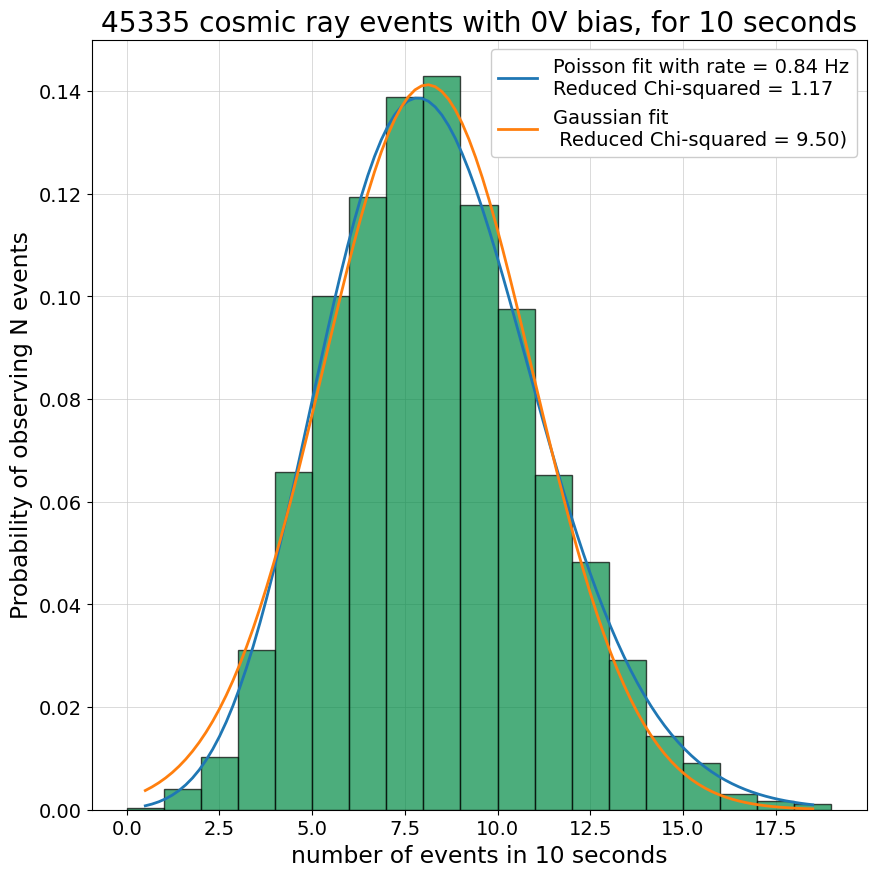

In [23]:
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.special import loggamma

#numerically stable poisson distribution 
def fitfunc(k, lam):
    return np.exp(k*np.log(lam) - lam - loggamma(k+1))


fig, ax = plt.subplots()


bins = range(int(2*dur)) #number of events in dur seconds
n, bins, patches = ax.hist(nev, bins=bins, density=True, alpha=0.7, color='#008B45', edgecolor='black')
bin_centers = 0.5*(bins[1:] + bins[:-1])

# Function for fitting Gaussian
def gaussian_fit(k, mu, sigma):
    return norm.pdf(k, loc=mu, scale=sigma)
# Fit Gaussian distribution to the original data
gaussian_popt, _ = curve_fit(lambda x, mu, sigma: gaussian_fit(x, mu, sigma), bin_centers, n, p0=[np.mean(nev), np.std(nev)])

popt, pcov = curve_fit(fitfunc, bin_centers, n, p0=[np.mean(nev)])

fitx = np.linspace(np.min(bin_centers), np.max(bin_centers), 100)
fity = fitfunc(fitx, *popt)
red_x2 = 0 
ndf = len(bin_centers) - 1
for i in range(len(n)):
    fitval = fitfunc(bin_centers[i], *popt)
    red_x2 += len(nev)*(n[i] - fitval)**2/fitval/ndf

# Recreate the Gaussian distribution fit
gaussian_fitx = np.linspace(np.min(bin_centers), np.max(bin_centers), 100)
gaussian_fity = gaussian_fit(gaussian_fitx, gaussian_popt[0], gaussian_popt[1])

# Calculate reduced chi-squared for Gaussian
red_x2_gaussian = 0
for i in range(len(n)):
    fitval = gaussian_fit(bin_centers[i], gaussian_popt[0], gaussian_popt[1])
    red_x2_gaussian += len(nev) * (n[i] - fitval) ** 2 / fitval / ndf
   
    
#ax.plot(fitx, fity, label="Poisson with rate = {:0.2f} Hz\n".format(popt[0]/dur))#+ r"$\chi^2$/{:d} = {:.2f}".format(ndf, red_x2))
ax.plot(fitx, fity, label=f"Poisson fit with rate = {popt[0] / dur:.2f} Hz\nReduced Chi-squared = {red_x2:.2f}")
ax.plot(gaussian_fitx, gaussian_fity, label=f"Gaussian fit\n Reduced Chi-squared = {red_x2_gaussian:.2f})")


ax.set_title("{:d} cosmic ray events with 0V bias, for {:0.0f} seconds".format(len(df7), dur))
ax.set_xlabel("number of events in {:0.0f} seconds".format(dur))
ax.set_ylabel("Probability of observing N events")
ax.legend()
plt.show()

In [43]:
from scipy.stats import poisson

# 给定泊松分布的均值（lambda）
lambda_value = 8.8

# 计算99%置信区间
confidence_level = 0.999
interval = poisson.interval(confidence_level, lambda_value)

print("99%置信区间:", interval)

99%置信区间: (1.0, 20.0)
